In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge,LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler

In [2]:
df17 = pd.read_csv('df17.csv')

In [1318]:
df17.columns

Index(['ABS', 'ActiveSafetySysNote', 'AdaptiveCruiseControl',
       'AdaptiveDrivingBeam', 'AirBagLocCurtain', 'AirBagLocFront',
       'AirBagLocKnee', 'AirBagLocSeatCushion', 'AirBagLocSide',
       'AutoReverseSystem',
       ...
       'paint_color', 'image_url', 'description', 'county', 'state', 'lat',
       'long', 'posting_date', 'Year', 'displ'],
      dtype='object', length=111)

In [12]:
cats = ['Turbo', 'BodyClass', 'FuelTypePrimary', 'EngineCylinders', 'VehicleType', 'DriveType','GVWR', 'Doors', 'paint_color']
numbers = ['odometer', 'ModelYear', 'displ']
pred = ['price']

In [13]:
df_c = pd.get_dummies(df17[cats].astype(str))

In [14]:
df_new = pd.concat([df_c, df17[['odometer', 'ModelYear', 'displ','price']]], axis=1)

In [15]:
from sklearn.model_selection import train_test_split

X = df_new.drop(['price'], axis=1)
y = df_new['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

In [16]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

X_train[['odometer', 'ModelYear', 'displ']] = sc.fit_transform(X_train[['odometer', 'ModelYear', 'displ']])
X_test[['odometer', 'ModelYear', 'displ']] = sc.transform(X_test[['odometer', 'ModelYear', 'displ']])

In [17]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(X_train.shape, y_train.shape)


(71467, 68) (71467,)


In [18]:
rModel = LinearRegression()
rModel.fit(X_train, y_train)

LinearRegression()

In [19]:
print(rModel.score(X_train, y_train))

0.7161212170235276


In [21]:
y_test_pred = rModel.predict(X_test)
y_train_pred = rModel.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

# Print metrics
print(f"Train MSE: {train_mse:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Train MAE: {train_mae:.4f}")

print('\n')

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

# Print metrics
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Train MSE: 52152436.5279
Train RMSE: 7221.6644
Train R²: 0.7161
Train MAE: 4718.8734


Test MSE: 54546221.0446
Test RMSE: 7385.5414
Test R²: 0.7034
Test MAE: 4708.0350


In [22]:
from sklearn.metrics import make_scorer

def get_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

rmse_scorer = make_scorer(get_rmse, greater_is_better=False)

<Axes: >

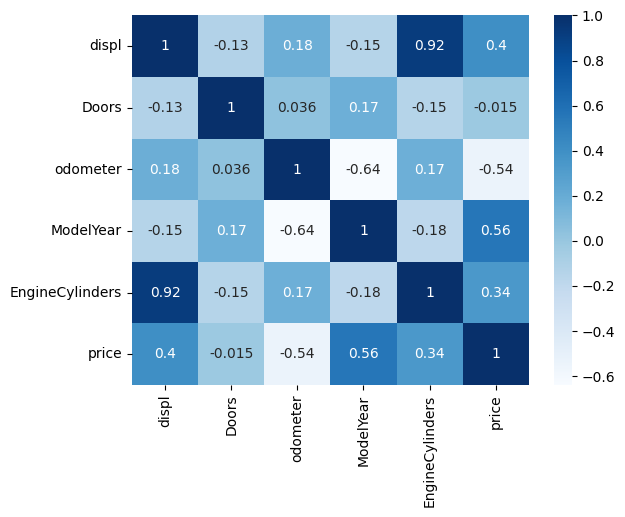

In [23]:
import seaborn as sns
sns.heatmap(df17[['displ', 'Doors', 'odometer',  'ModelYear', 'EngineCylinders', 'price']].corr(), annot=True,cmap ='Blues')

In [25]:
df18 = df17[cats+numbers+pred]
df18.columns

Index(['Turbo', 'BodyClass', 'FuelTypePrimary', 'EngineCylinders',
       'VehicleType', 'DriveType', 'GVWR', 'Doors', 'paint_color', 'odometer',
       'ModelYear', 'displ', 'price'],
      dtype='object')

In [40]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge,LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

def df_to_model_u(df):
    cats = ['Turbo', 'VehicleType', 'BodyClass', 'EngineCylinders', 'FuelTypePrimary', 'DriveType','GVWR', 'Doors', 'paint_color']
    numbers = ['odometer', 'ModelYear', 'displ']
    pred = ['price']

    df_c = pd.get_dummies(df[cats].astype(str))
    df_new = pd.concat([df_c, df[['odometer', 'ModelYear', 'displ','price']]], axis=1)
    X = df_new.drop(['price'], axis=1)
    y = df_new['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 142)  


    sc = MinMaxScaler()
    X_train[['odometer', 'ModelYear', 'displ']] = sc.fit_transform(X_train[['odometer', 'ModelYear', 'displ']])
    X_test[['odometer', 'ModelYear', 'displ']] = sc.transform(X_test[['odometer', 'ModelYear', 'displ']])    

    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    
    # Print metrics
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Train MAE: {train_mae:.4f}")

    print('\n')
    
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    
    # Print metrics
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Test MAE: {test_mae:.4f}")

    test_df = X_test.copy() # Copy the test features to a new DataFrame
    test_df['actual'] = y_test.values  # Add actual values
    test_df['predicted'] = y_test_pred  # Add predicted values
    test_df['errors'] = test_df['actual'] - test_df['predicted']

    train_df = X_train.copy() # Copy the test features to a new DataFrame
    train_df['actual'] = y_train.values  # Add actual values
    train_df['predicted'] = y_train_pred  # Add predicted values
    train_df['errors'] = train_df['actual'] - train_df['predicted']
    
    full_df = pd.concat([train_df, test_df])

    return full_df, test_rmse

In [39]:
def df_to_model_cyl_n(df):
    
    cats = ['Turbo', 'VehicleType', 'BodyClass', 'FuelTypePrimary', 'DriveType','GVWR', 'Doors', 'paint_color']
    numbers = ['odometer',  'EngineCylinders', 'ModelYear', 'displ','price']

    df_c = pd.get_dummies(df[cats].astype(str))
    df_new = pd.concat([df_c, df[numbers]], axis=1)
    X = df_new.drop(['price'], axis=1)
    y = df_new['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 142)  


    sc = MinMaxScaler()
    X_train[['odometer', 'ModelYear', 'displ']] = sc.fit_transform(X_train[['odometer', 'ModelYear', 'displ']])
    X_test[['odometer', 'ModelYear', 'displ']] = sc.transform(X_test[['odometer', 'ModelYear', 'displ']])    

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    
    # Print metrics
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Train MAE: {train_mae:.4f}")

    print('\n')
    
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    
    # Print metrics
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Test MAE: {test_mae:.4f}")

    test_df = X_test.copy() # Copy the test features to a new DataFrame
    test_df['actual'] = y_test.values  # Add actual values
    test_df['predicted'] = y_test_pred  # Add predicted values
    test_df['errors'] = test_df['actual'] - test_df['predicted']

    train_df = X_train.copy() # Copy the test features to a new DataFrame
    train_df['actual'] = y_train.values  # Add actual values
    train_df['predicted'] = y_train_pred  # Add predicted values
    train_df['errors'] = train_df['actual'] - train_df['predicted']
    
    full_df = pd.concat([train_df, test_df])

    return full_df, test_rmse

In [26]:
df17.FuelTypePrimary.value_counts(dropna=False)

FuelTypePrimary
Gasoline                        81710
Diesel                           4486
Flexible Fuel Vehicle (FFV)      2702
Electric                          375
Ethanol (E85)                      50
Compressed Natural Gas (CNG)       11
Name: count, dtype: int64

In [28]:
df17.EngineCylinders.value_counts()

EngineCylinders
4.0     36598
6.0     31963
8.0     19637
5.0       650
3.0       279
10.0      117
12.0       57
2.0        19
0.0        14
Name: count, dtype: int64

In [29]:
df17[df17.EngineCylinders.isin([0,2])][['Make','Model','EngineCylinders','FuelTypePrimary']].value_counts()

Make        Model            EngineCylinders  FuelTypePrimary
BMW         i3               2.0              Electric           18
MAZDA       RX-8             0.0              Gasoline            8
AUDI        A3               2.0              Gasoline            1
FORD        Ranger           0.0              Gasoline            1
HYUNDAI     Sonata           0.0              Gasoline            1
            Veloster         0.0              Gasoline            1
KIA         Optima           0.0              Gasoline            1
MITSUBISHI  Outlander Sport  0.0              Gasoline            1
NISSAN      Quest            0.0              Gasoline            1
Name: count, dtype: int64

In [30]:
df17[df17.EngineCylinders.isin([10, 12])][['Make','Model','EngineCylinders','FuelTypePrimary']].value_counts()

Make           Model              EngineCylinders  FuelTypePrimary            
FORD           F-250              10.0             Gasoline                       30
               Excursion          10.0             Gasoline                       26
               F-350              10.0             Gasoline                       15
BENTLEY        Continental        12.0             Gasoline                       13
MERCEDES-BENZ  S-Class            12.0             Gasoline                        9
BMW            M6                 10.0             Gasoline                        9
               750Li / ALPINA B7  12.0             Gasoline                        8
               M5                 10.0             Gasoline                        8
DODGE          Ram                10.0             Gasoline                        8
               Viper              10.0             Gasoline                        4
MERCEDES-BENZ  CL-Class           12.0             Gasoline            

In [31]:
len(df17[df17.EngineCylinders.isin([3, 5])])

929

In [ ]:
cyl_cat_nf = []
cyl_num_nf = []
num_rows_nf = []

cyl_cat_f = []
cyl_num_f = []
num_rows_f = []

df17_f = df17.copy()
df17_f.FuelTypePrimary = df17_f.FuelTypePrimary.replace({'Compressed Natural Gas (CNG)' : 'Flexible Fuel Vehicle (FFV)', 'Ethanol (E85)' : 'Flexible Fuel Vehicle (FFV)'})

df_35_f = df17_f[df17_f.EngineCylinders.isin([3.0, 4.0, 5.0, 6.0, 8.0])]
df_468_f = df17_f[df17_f.EngineCylinders.isin([4.0, 6.0, 8.0])]

df_35_nf = df17[df17.EngineCylinders.isin([3.0, 4.0, 5.0, 6.0, 8.0])]
df_468_nf = df17[df17.EngineCylinders.isin([4.0, 6.0, 8.0])]

for df in [df17, df_35_nf, df_468_nf]:
    
    c_test_rmse = round(df_to_model_u(df)[1],1)
    cyl_cat_nf.append(c_test_rmse)
    
    n_test_rmse = round(df_to_model_cyl_n(df)[1],1)
    cyl_num_nf.append(n_test_rmse)

    num_rows_nf.append(len(df17) - len(df))

for df in [df17_f, df_35_f, df_468_f]:
        
    c_test_rmse = round(df_to_model_u(df)[1],1)
    cyl_cat_f.append(c_test_rmse)
    
    n_test_rmse = round(df_to_model_cyl_n(df)[1],1)
    cyl_num_f.append(n_test_rmse)

    num_rows_f.append(len(df17) - len(df))

In [70]:
print('Categorical Encoding Error Change Across Dataframes: ')
print(cyl_cat_nf)
print('\n')
print('Numerical Encoding Error Change Across Dataframes: ')
print(cyl_num_nf)
print('\n')
print('num rows dropped each time: ')
print(num_rows_nf)
print('\n')
print('Categorical Encoding Error Change Across Dataframes: ')
print(cyl_cat_f)
print('\n')
print('Numerical Encoding Error Change Across Dataframes: ')
print(cyl_num_f)
print('\n')
print('num rows dropped each time: ')
print(num_rows_f)
print('\n')


Categorical Encoding Error Change Across Dataframes: 
[7384.8, 7302.1, 7282.4]


Numerical Encoding Error Change Across Dataframes: 
[7423.2, 7323.0, 7296.6]


num rows dropped each time: 
[0, 207, 1136]


Categorical Encoding Error Change Across Dataframes: 
[7385.7, 7303.4, 7281.2]


Numerical Encoding Error Change Across Dataframes: 
[7425.0, 7322.7, 7295.7]


num rows dropped each time: 
[0, 207, 1136]




In [75]:
import matplotlib.pyplot as plt
import numpy as np

def compare_cyl_2bar(errorls1, errorls2, label1, label2, title):
    #[df17, df18, df_35_f, df_35_nf, df19_nf,  df19_f]
    labels = ['All data', '3+5 Cyl', '4+6+8']
    # Number of groups
    n_groups = len(labels)
    
    # Positions of the bars on the x-axis
    bar_width = 0.35  # Width of the bars
    index = np.arange(n_groups)  # The label locations
    
    # Plot bars
    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(index - bar_width, errorls1, bar_width, label=label1)
    bars2 = ax.bar(index, errorls2, bar_width, label=label2)
    #bars3 = ax.bar(index + bar_width, [0, 0, 207, 207, 1136, 1136], bar_width, label='Num Rows Dropped')
    
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Center of the bar
                height,                              # Height of the bar
                f'{height:.2f}',                     # Height value
                ha='center',                         # Horizontal alignment
                va='bottom',                         # Vertical alignment
                fontsize=10,                         # Font size
                color='black'                        # Font color
            )
    
            
    # Add labels, title, and legend
    ax.set_ylabel('Errors (RMSE)')
    ax.set_title('Engine Cylinders as Numeric vs. Categorical ' + title)
    ax.set_xticks(index)
    ax.set_xticklabels(labels, rotation=45, ha='right')  # Rotate labels for better readability
    ax.legend()
    ax.set_ylim(7000,7500)  # Adjust the y-axis limit to ensure all bars fit
    
    # Display plot
    plt.tight_layout()
    plt.show()

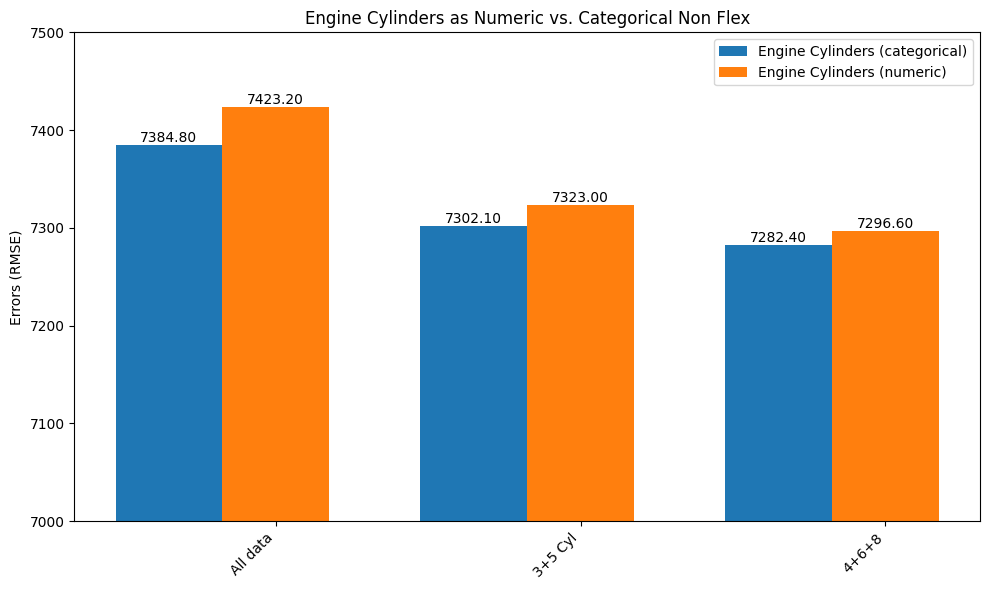

In [76]:
compare_cyl_2bar(cyl_cat_nf, cyl_num_nf, 'Engine Cylinders (categorical)', 'Engine Cylinders (numeric)', '(Non Flex)')

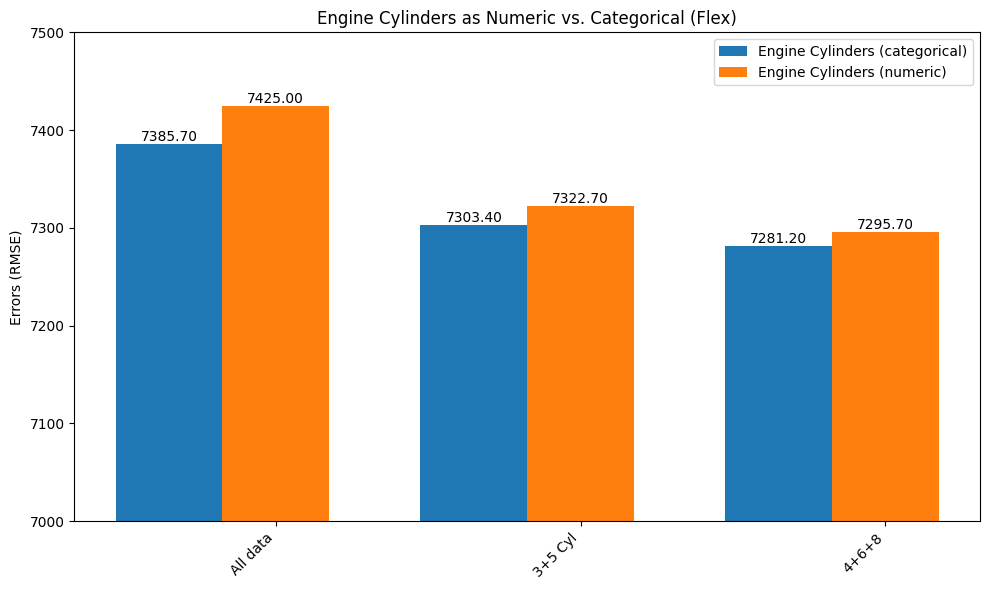

In [79]:
compare_cyl_2bar(cyl_cat_f, cyl_num_f, 'Engine Cylinders (categorical)', 'Engine Cylinders (numeric)', '(Flex)')

In [342]:
[(100*(x/cyl_cat_f[0])) for x in cyl_cat_f[1:]]

[98.88568449842262, 98.5851036462353]

In [344]:
num_rows_f

[0, 207, 1136]

In [396]:
def two_by_two(labels, ls_1, label1, ls_2,  label2):


    ls2 = [ls_1[0], ls_2[0]]
    ls1 = [ls_1[1], ls_2[1]]
    
    # Positions of the bars on the x-axis
    bar_width = 0.35  # Width of the bars
    labels = labels
    # Number of groups
    n_groups = len(labels)
    index = np.arange(n_groups)
    # Plot bars
    fig, ax = plt.subplots(figsize=(10, 6))
    
    bar_1 = ax.bar(index - bar_width/2, ls2, bar_width, label= label2)
    bar_2 = ax.bar(index + bar_width/2, ls1, bar_width, label= label1)
    
    # Annotate bars
    for bars in [bar_1, bar_2]:
        for bar in bars:
            height = round(bar.get_height(),2)
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Center of the bar
                height,                              # Height of the bar
                f'{height}%',                         # Height value
                ha='center',                         # Horizontal alignment
                va='bottom',                         # Vertical alignment
                fontsize=10,                         # Font size
                color='black'                        # Font color
            )

            
    # Add labels, title, and legend
    ax.set_ylabel('Percentage')
    ax.set_title('EngineCylinders Values Kept & Error % Decrease')
    ax.set_xticks(index)
    ax.legend()    
    ax.set_xticklabels(labels, rotation=45, ha='right')  # Rotate labels for better readability
    ax.set_ylim(min(ls1+ls2) -0.1, 100)  # Adjust the y-axis limit to ensure all bars fit
    
    plt.show()

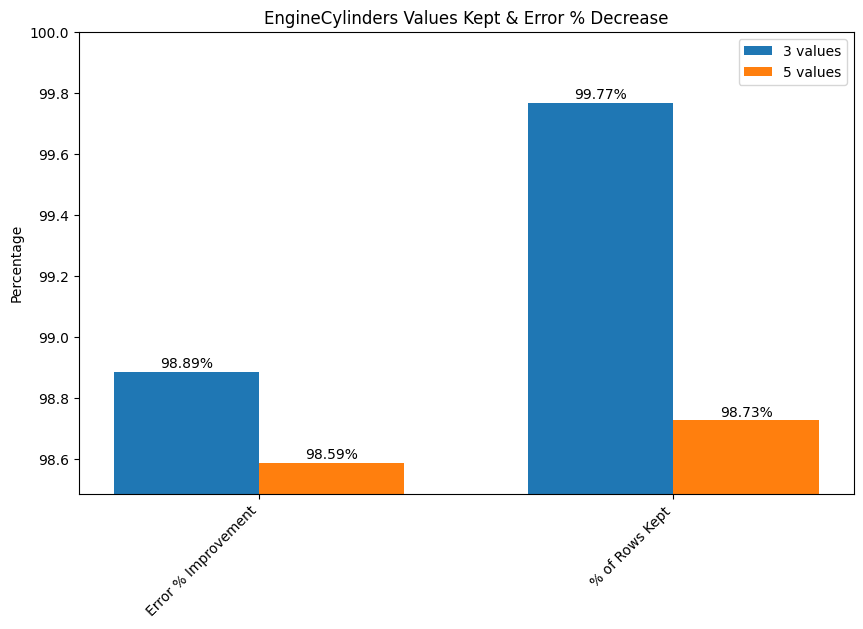

In [397]:
two_by_two(['Error % Improvement', '% of Rows Kept'],[(100*(x/cyl_cat_f[0])) for x in cyl_cat_f[1:]], '5 values', [(100*((len(df17)-x))/(len(df17))) for x in num_rows_f[1:]], '3 values')

In [401]:
round(100*((num_rows_f[2]))/(len(df17)),2)

1.27

In [409]:
print('Dropping ' + str(num_rows_f[1] - num_rows_f[0]) + ' rows (' + str(round(100*((num_rows_f[1]))/(len(df17)),2)) + '%) => $' + str(round((cyl_cat_f[0]-cyl_cat_f[1]),2)) + '0 (' + str(round((((cyl_cat_f[0]-cyl_cat_f[1])/cyl_cat_f[0])*100),2)) + '%) Error Decrease')
print('Dropping ' + str(num_rows_f[2] - num_rows_f[0]) + ' rows (' + str(round(100*((num_rows_f[2]))/(len(df17)),2)) + '%) => $' + str(round((cyl_cat_f[0]-cyl_cat_f[2]),2)) + '0 (' + str(round((((cyl_cat_f[0]-cyl_cat_f[2])/cyl_cat_f[0])*100),2)) + '%) Error Decrease')



Dropping 207 rows (0.23%) => $82.30 (1.11%) Error Decrease
Dropping 1136 rows (1.27%) => $104.50 (1.41%) Error Decrease


In [410]:
err_df20, t0 = df_to_model_u(df_35_f)

Train MSE: 51466806.8712
Train RMSE: 7174.0370
Train R²: 0.7170
Train MAE: 4694.2336


Test MSE: 53339056.5197
Test RMSE: 7303.3593
Test R²: 0.7122
Test MAE: 4751.4658


In [411]:
df20 = df_35_f.copy()
df20['EngineCylinders'] = df20['EngineCylinders'].replace({3:4, 5:4})
err_df20, t1 = df_to_model_u(df20)

Train MSE: 51507537.8857
Train RMSE: 7176.8752
Train R²: 0.7168
Train MAE: 4693.4671


Test MSE: 53366003.0225
Test RMSE: 7305.2038
Test R²: 0.7121
Test MAE: 4749.6461


In [412]:
df20 = df_35_f.copy()
df20['EngineCylinders'] = df20['EngineCylinders'].replace({3:6, 5:6})
err_df20, t2 = df_to_model_u(df20)

Train MSE: 51536741.3518
Train RMSE: 7178.9095
Train R²: 0.7167
Train MAE: 4696.0274


Test MSE: 53417848.3370
Test RMSE: 7308.7515
Test R²: 0.7118
Test MAE: 4754.0933


In [413]:
df20 = df_35_f.copy()
df20['EngineCylinders'] = df20['EngineCylinders'].replace({3:4, 5:6})
err_df20, t3 = df_to_model_u(df20)

Train MSE: 51499236.1625
Train RMSE: 7176.2968
Train R²: 0.7169
Train MAE: 4693.9287


Test MSE: 53356655.9140
Test RMSE: 7304.5640
Test R²: 0.7121
Test MAE: 4751.4286


In [414]:
df20 = df_35_f.copy()
df20['EngineCylinders'] = df20['EngineCylinders'].replace({5:3})
err_df20, t4 = df_to_model_u(df20)

Train MSE: 51507507.3009
Train RMSE: 7176.8731
Train R²: 0.7168
Train MAE: 4695.1022


Test MSE: 53365555.2956
Test RMSE: 7305.1732
Test R²: 0.7121
Test MAE: 4751.2009


In [ ]:
t5
Dropping

In [424]:
err_468, t468 = df_to_model_u(df_468_f)

Train MSE: 51681390.8149
Train RMSE: 7188.9770
Train R²: 0.7191
Train MAE: 4708.4126


Test MSE: 53015907.4037
Test RMSE: 7281.2023
Test R²: 0.7059
Test MAE: 4751.5046


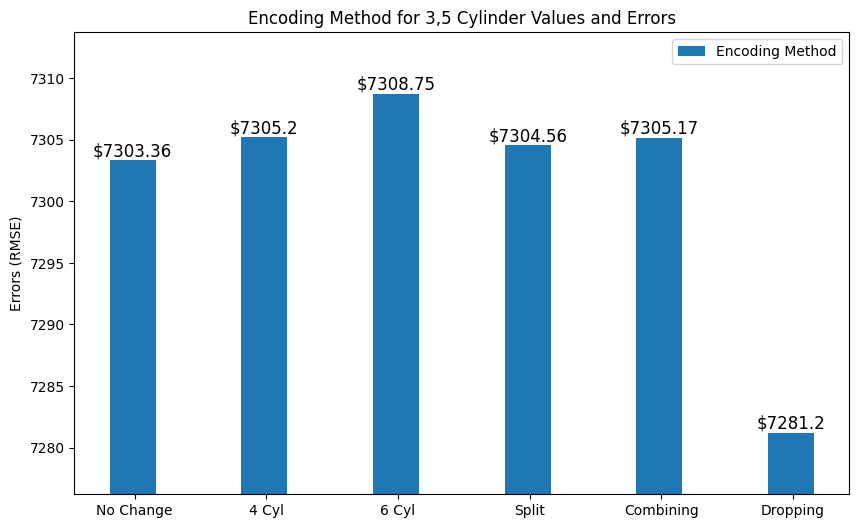

In [425]:
labels = ['No Change', '4 Cyl', '6 Cyl', 'Split', 'Combining', 'Dropping']

da_boys = [round(t0,2), round(t1,2), round(t2,2), round(t3,2), round(t4,2), round(t468,2)]

# Number of groups
n_groups = len(labels)

# Positions of the bars on the x-axis
bar_width = 0.35  # Width of the bars
index = np.arange(n_groups)  # The label locations

# Plot bars
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(index - bar_width/25, da_boys, bar_width, label='Encoding Method')
#bars2 = ax.bar(index + bar_width/2, num, bar_width, label='Engine Cylinders (numeric)')

for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'${height}', 
            ha='center', va='bottom', fontsize=12, color='black')
    
# Add labels, title, and legend
#ax.set_xlabel('All Cylinders All Fuel, All Cylinders Flex Fuel, Dropped Cylinders Flex Fuel')
ax.set_ylabel('Errors (RMSE)')
ax.set_title('Encoding Method for 3,5 Cylinder Values and Errors')
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(min(da_boys) - 5, max(da_boys) + 5)


# Display plot
plt.show()

In [298]:
from sklearn.linear_model import RidgeCV

def ridge_cv(df):
    
    cats = ['Turbo', 'VehicleType', 'BodyClass', 'EngineCylinders', 'FuelTypePrimary', 'DriveType','GVWR', 'Doors', 'paint_color']
    numbers = ['odometer', 'ModelYear', 'displ']
    pred = ['price']

    df_c = pd.get_dummies(df[cats].astype(str))
    df_new = pd.concat([df_c, df[['odometer', 'ModelYear', 'displ','price']]], axis=1)
    X = df_new.drop(['price'], axis=1)
    y = df_new['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 142)  

    sc = MinMaxScaler()
    X_train[['odometer', 'ModelYear', 'displ']] = sc.fit_transform(X_train[['odometer', 'ModelYear', 'displ']])
    X_test[['odometer', 'ModelYear', 'displ']] = sc.transform(X_test[['odometer', 'ModelYear', 'displ']])   
    
    # Define a range of alpha values to test
    alphas = np.logspace(-6, 6, 13)  # Exponential range from 1e-6 to 1e6
    
    # Initialize RidgeCV
    ridge_cv = RidgeCV(alphas=alphas, cv=5)
    
    # Fit RidgeCV model
    ridge_cv.fit(X_train, y_train)

    # Retrieve the best alpha and coefficients
    best_alpha = ridge_cv.alpha_
    coefficients = ridge_cv.coef_

    print('Best Alpha:')
    print(best_alpha)
    
    # Get the coefficients
    #print("Ridge Coefficients:")
    #print(coefficients)

    # Predict on the test set
    y_test_pred = ridge_cv.predict(X_test)
    y_train_pred = ridge_cv.predict(X_train)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    
    # Print metrics
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Train MAE: {train_mae:.4f}")

    print('\n')
    
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    
    # Print metrics
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Test MAE: {test_mae:.4f}")

    coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
    })
    
    coef_df = coef_df.sort_values(by='Coefficient', ascending=True)
    
    # Plotting
    plt.figure(figsize=(20, 12))
    plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
    plt.xlabel('Coefficient Value')
    plt.title(f'Ridge Regression Coefficients (Alpha = {best_alpha})')
    
    # Add text annotations
    for index, value in enumerate(coefficients):
        plt.text(value, index, f'{value:.2f}', va='center')

    plt.show()
    return coef_df

Best Alpha:
1.0
Train MSE: 43218667.2705
Train RMSE: 6574.0906
Train R²: 0.7490
Train MAE: 4527.8819


Test MSE: 44636820.6003
Test RMSE: 6681.0793
Test R²: 0.7395
Test MAE: 4586.4687


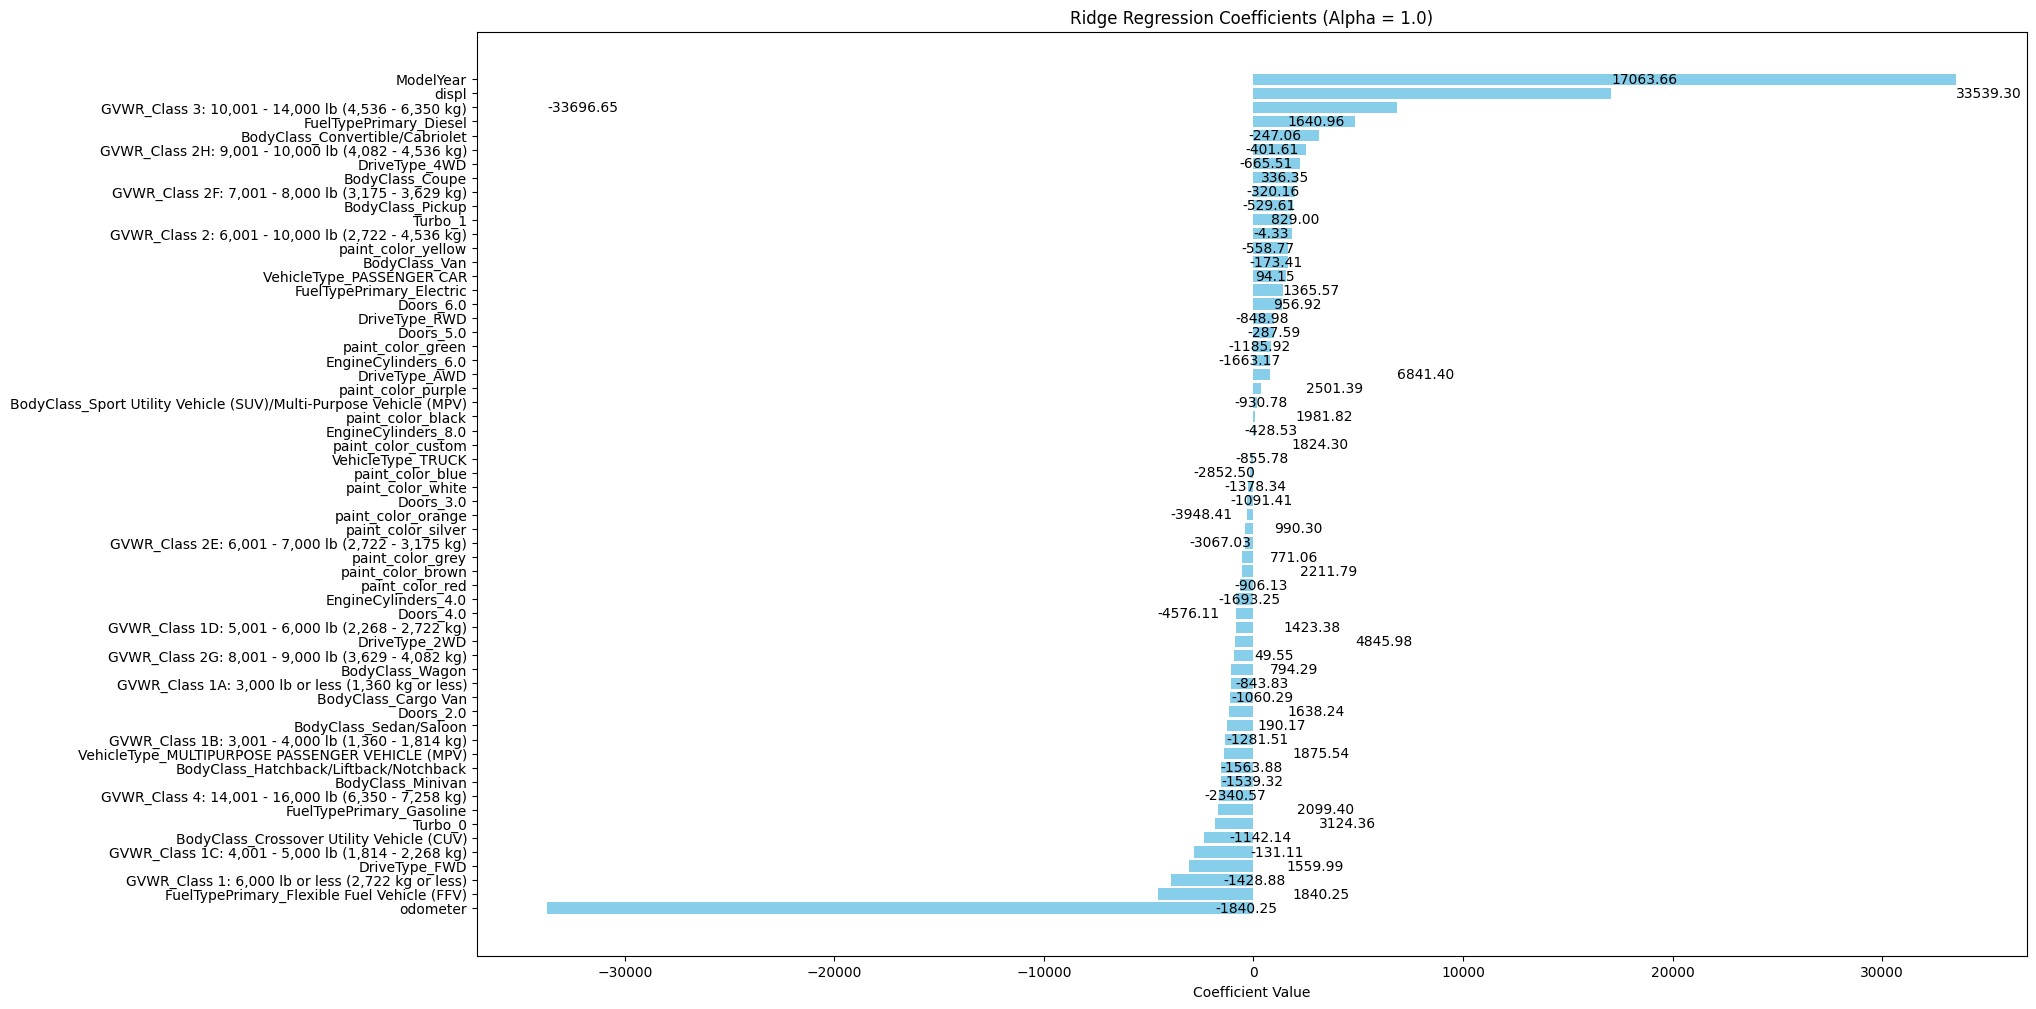

In [299]:
coef_df = ridge_cv(df_new1)

In [302]:
from sklearn.linear_model import LassoCV

def lasso_cv(df):
    
    cats = ['Turbo', 'VehicleType', 'BodyClass', 'EngineCylinders', 'FuelTypePrimary', 'DriveType','GVWR', 'Doors', 'paint_color']
    numbers = ['odometer', 'ModelYear', 'displ']
    pred = ['price']

    df_c = pd.get_dummies(df[cats].astype(str))
    df_new = pd.concat([df_c, df[['odometer', 'ModelYear', 'displ','price']]], axis=1)
    X = df_new.drop(['price'], axis=1)
    y = df_new['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 142)  

    sc = MinMaxScaler()
    X_train[['odometer', 'ModelYear', 'displ']] = sc.fit_transform(X_train[['odometer', 'ModelYear', 'displ']])
    X_test[['odometer', 'ModelYear', 'displ']] = sc.transform(X_test[['odometer', 'ModelYear', 'displ']])   
    
    # Define a range of alpha values to test
    alphas = np.logspace(-6, 6, 13)  # Exponential range from 1e-6 to 1e6
    
    # Initialize LassoCV
    lasso_cv = LassoCV(alphas=alphas, cv=5, tol=0.001, max_iter=10000)
    
    # Fit LassoCV model
    lasso_cv.fit(X_train, y_train)

    # Retrieve the best alpha and coefficients
    best_alpha = lasso_cv.alpha_
    coefficients = lasso_cv.coef_

    print('Best Alpha:')
    print(best_alpha)
    
    # Get the coefficients
    #print("Lasso Coefficients:")
    #print(coefficients)

    # Predict on the test set
    y_test_pred = lasso_cv.predict(X_test)
    y_train_pred = lasso_cv.predict(X_train)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    
    # Print metrics
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Train MAE: {train_mae:.4f}")

    print('\n')
    
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    
    # Print metrics
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Test MAE: {test_mae:.4f}")

    coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
    })
    
    coef_df = coef_df.sort_values(by='Coefficient', ascending=True)
    
    # Plotting
    plt.figure(figsize=(20, 12))
    plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
    plt.xlabel('Coefficient Value')
    plt.title(f'Lasso Regression Coefficients (Alpha = {best_alpha})')
    
    # Add text annotations
    for index, value in enumerate(coefficients):
        plt.text(value, index, f'{value:.2f}', va='center')

    plt.show()
    return coef_df

Best Alpha:
0.1
Train MSE: 43218831.2240
Train RMSE: 6574.1031
Train R²: 0.7490
Train MAE: 4527.9535


Test MSE: 44636007.6610
Test RMSE: 6681.0185
Test R²: 0.7395
Test MAE: 4586.4869


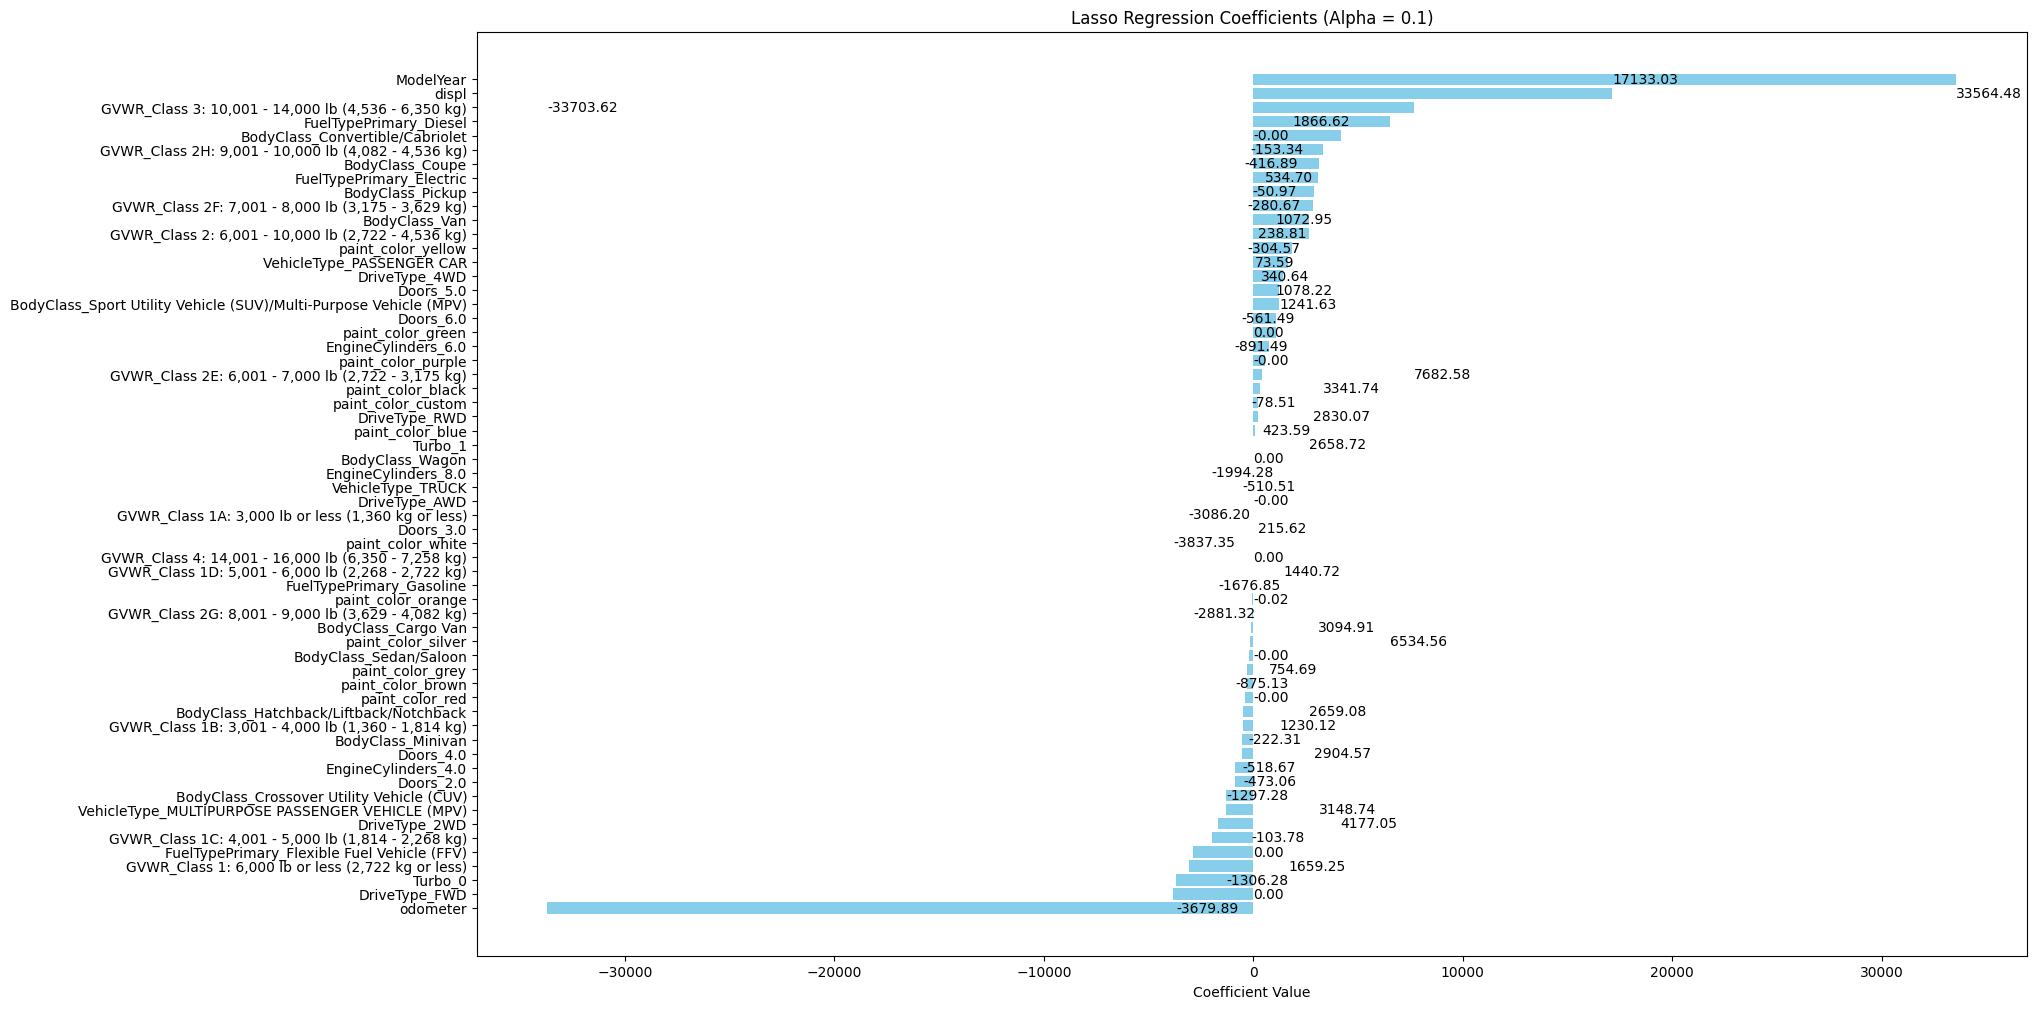

In [303]:
lasso_df = lasso_cv(df_new1)

In [313]:
def df_to_model_no_paint(df):
    cats = ['Turbo', 'VehicleType', 'BodyClass', 'EngineCylinders', 'FuelTypePrimary', 'DriveType','GVWR', 'Doors']
    numbers = ['odometer', 'ModelYear', 'displ']
    pred = ['price']

    df_c = pd.get_dummies(df[cats].astype(str))
    df_new = pd.concat([df_c, df[['odometer', 'ModelYear', 'displ','price']]], axis=1)
    X = df_new.drop(['price'], axis=1)
    y = df_new[['price']]

    
    sc = MinMaxScaler()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 142)  
    X_train[['odometer', 'ModelYear', 'displ']] = sc.fit_transform(X_train[['odometer', 'ModelYear', 'displ']])
    X_test[['odometer', 'ModelYear', 'displ']] = sc.transform(X_test[['odometer', 'ModelYear', 'displ']])    
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    
    # Print metrics
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Train MAE: {train_mae:.4f}")

    print('\n')
    
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    
    # Print metrics
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Test MAE: {test_mae:.4f}")

    test_df = X_test.copy() # Copy the test features to a new DataFrame
    test_df['actual'] = y_test.values  # Add actual values
    test_df['predicted'] = y_test_pred  # Add predicted values
    test_df['errors'] = test_df['actual'] - test_df['predicted']

    train_df = X_train.copy() # Copy the test features to a new DataFrame
    train_df['actual'] = y_train.values  # Add actual values
    train_df['predicted'] = y_train_pred  # Add predicted values
    train_df['errors'] = train_df['actual'] - train_df['predicted']
    
    full_df = pd.concat([train_df, test_df])

    return full_df, test_rmse

In [314]:
df_no_paint = df_new1.drop(columns=['paint_color'])

In [315]:
err_paint, rmse_paint = df_to_model_u(df_new1)

Train MSE: 43221132.3727
Train RMSE: 6574.2781
Train R²: 0.7490
Train MAE: 4528.2766


Test MSE: 44639684.0459
Test RMSE: 6681.2936
Test R²: 0.7395
Test MAE: 4586.8176


In [316]:
err_no_paint, rmse_no_paint = df_to_model_no_paint(df_no_paint)

Train MSE: 43312667.5479
Train RMSE: 6581.2360
Train R²: 0.7485
Train MAE: 4535.9887


Test MSE: 44708845.3471
Test RMSE: 6686.4673
Test R²: 0.7391
Test MAE: 4591.5024


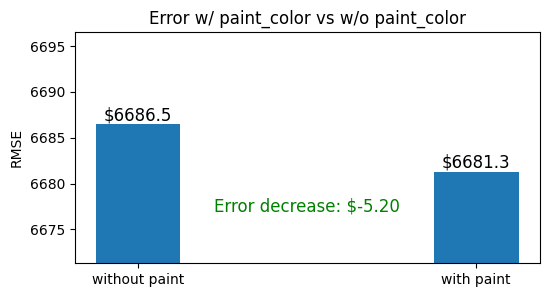

In [465]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['without paint', 'with paint']  # Replace with your actual categories
values = [round(rmse_no_paint,1),round(rmse_paint,1)]
diff = round(values[1] - values[0],2)

# Number of bars
n_bars = len(values)
bar_width = 0.25  # Width of each bar (adjust as needed)
index = np.arange(n_bars)  # x locations for the groups

# Create the plot
fig, ax = plt.subplots(figsize=(6,3))

# Plot bars
bars = ax.bar(index, values, bar_width)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Center of the bar
        height,                              # Height of the bar
        f'${height}',                         # Height value
        ha='center',                         # Horizontal alignment
        va='bottom',                         # Vertical alignment
        fontsize=12,                         # Font size
        color='black'                        # Font color
    )
ax.text(
    (bars[0].get_x() + bars[0].get_width() / 2 + bars[1].get_x() + bars[1].get_width() / 2) / 2,  # Center of the space between bars
    max(values) -10 ,                            # Place annotation just above the highest bar
    f'Error decrease: ${diff}0',                      # Difference text
    ha='center',                                # Horizontal alignment
    va='bottom',                                # Vertical alignment
    fontsize=12,                                # Font size
    color='green'                                 # Font color
)

ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.set_ylabel('RMSE')
ax.set_title('Error w/ paint_color vs w/o paint_color')
ax.set_ylim(min(values)-10, max(values) + 10)  # Add some padding above the highest bar

# Display plot
plt.show()


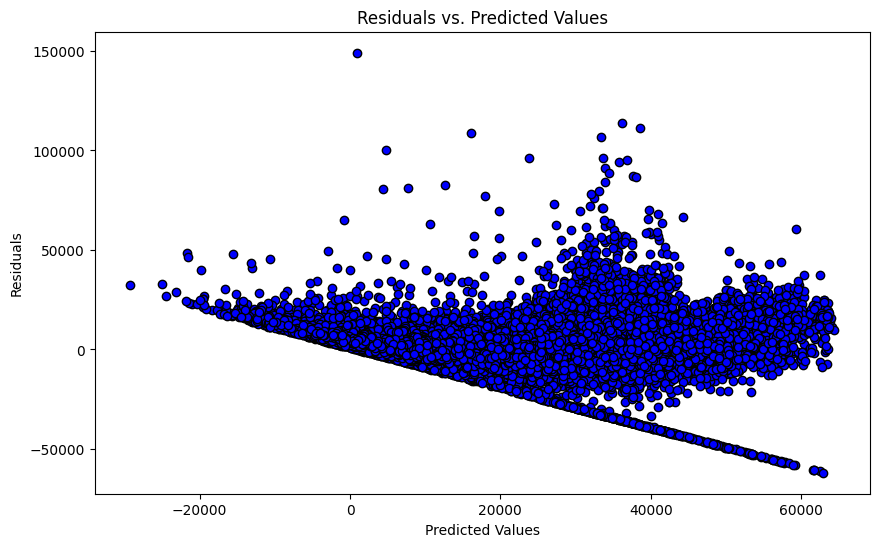

In [427]:
plt.figure(figsize=(10, 6))

# Plot residuals vs. predicted values
plt.scatter(err_468['predicted'], err_468['errors'], color='blue', edgecolor='k')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')

plt.show()

In [428]:
print('Actual Minimum Price: $' + str(err_468['actual'].min()))
print('Actual Mean Price: $' + str(err_468['actual'].mean()))
print('Actual Maximum Price: $' + str(err_468['actual'].max()))      
print('\n')
print('Predicted Minimum Price: $' + str(err_468['predicted'].min()))
print('Predicted Mean Price: $' + str(err_468['predicted'].mean()))
print('Predicted Maximum Price: $' + str(err_468['predicted'].max()))


Actual Minimum Price: $500
Actual Mean Price: $18937.7921721581
Actual Maximum Price: $150000


Predicted Minimum Price: $-29282.0
Predicted Mean Price: $18950.001269870067
Predicted Maximum Price: $64440.0


In [280]:
err_468[(err_468['predicted'] < 5000) & (err_468['actual'] > 120000)][['predicted','actual']]

,predicted,actual
24169,878.0,150000


In [281]:
df17.loc[24169, ['Make','Model','ModelYear','odometer','EngineCylinders','BodyClass', 'displ','DriveType','EngineConfiguration','Turbo','price']]

Make                                                                FORD
Model                                                             Escape
ModelYear                                                         2009.0
odometer                                                        182415.0
EngineCylinders                                                      4.0
BodyClass              Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...
displ                                                             2500.0
DriveType                                                            2WD
EngineConfiguration                                              In-Line
Turbo                                                                  0
price                                                             150000
Name: 24169, dtype: object

In [283]:
def hist_std_mean(df):
    
    # Generate sample data
    #np.random.seed(42)
    data = df.price  # Normally distributed data
    
    # Calculate mean and standard deviation
    mean = np.mean(data)
    median = np.median(data)
    std_dev = np.std(data)
    std_dev = 3*std_dev
    
    min = str(df.price.min())
    max = str(df.price.max())
    
    # Plot histogram
    plt.hist(data, bins=30, edgecolor='k', alpha=0.7, color='b')
    
    # Add lines for mean and standard deviation
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Mean: ' + str(round(mean,2)))
    plt.axvline(mean - std_dev, color='g', linestyle='dashed', linewidth=1, label='Mean - 3 Std Dev')
    plt.axvline(mean + std_dev, color='g', linestyle='dashed', linewidth=1, label='Mean + 3 Std Dev')
    
    # Optional: Add shaded region for standard deviation
    plt.fill_betweenx(
        [0, plt.ylim()[1]], 
        mean - std_dev, 
        mean + std_dev, 
        color='g', 
        alpha=0.2
    )
    
    # Add labels and legend
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.title('$' + min + ' to ' + max)
    plt.legend()
    
    # Show plot
    plt.show()


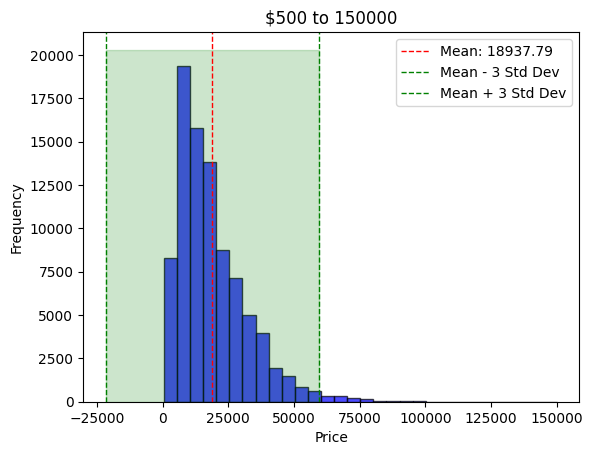

In [285]:
hist_std_mean(df_468_f)

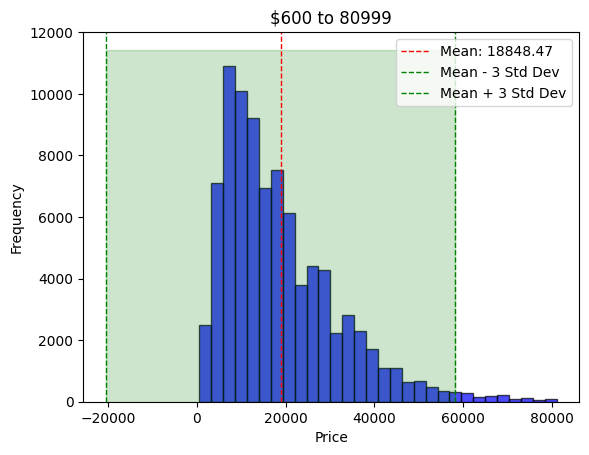

In [287]:
hist_std_mean(df_468_f[(df_468_f.price >= 600) & (df_468_f.price < 81000)])

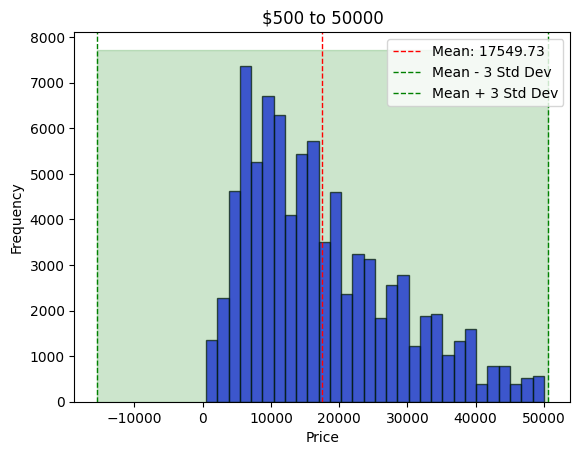

In [289]:
hist_std_mean(df_468_f[(df_468_f.price >= 500) & (df_468_f.price <= 50000)])

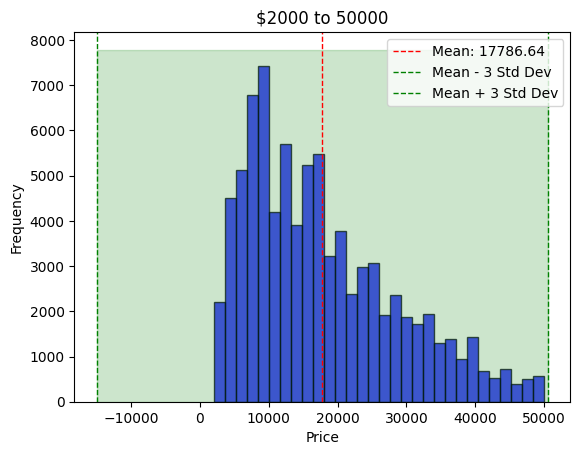

In [291]:
hist_std_mean(df_468_f[(df_468_f.price >= 2000) & (df_468_f.price <= 50000)])

In [232]:
for each in [100000, 80000, 60000]:
    print('Prices below $'+str(each))
    print(' Leaves ' + str(round(((1-((len(df19) - len(df19[(df19.price <= each)]))/ len(df19)))*100),4))+'%' + ' of the data')
    print(' Drops ' + str(len(df19) - len(df19[(df19.price <= each)])) + ' rows')
    print('\n')

Prices below $100000
 Leaves 99.9683% of the data
 Drops 28 rows


Prices below $80000
 Leaves 99.7993% of the data
 Drops 177 rows


Prices below $60000
 Leaves 98.6122% of the data
 Drops 1224 rows




In [231]:
for each in [600, 700, 1000]:
    print('Prices above $' + str(each))
    print(' Leaves ' + str(round(((1-((len(df19) - len(df19[(df19.price >= each)]))/ len(df19)))*100),4))+'%' + ' of the data')
    print(' Drops ' + str(len(df19) - len(df19[(df19.price >= each)])) + ' rows')
    print('\n')

Prices above $600
 Leaves 99.7018% of the data
 Drops 263 rows


Prices above $700
 Leaves 99.5623% of the data
 Drops 386 rows


Prices above $1000
 Leaves 99.2936% of the data
 Drops 623 rows




In [ ]:
hist_std_mean()

In [470]:
df_6_80 = df_468_f[(df_468_f.price >= 600) & (df_468_f.price <= 80000)]
df_5_50 = df_468_f[(df_468_f.price >= 500) & (df_468_f.price <= 50000)]
df_20_50 = df_468_f[(df_468_f.price >= 2000) & (df_468_f.price <= 50000)]

In [ ]:
cyl_cat_nf = []
cyl_num_nf = []
num_rows_nf = []

cyl_cat_f = []
cyl_num_f = []
num_rows_f = []

df17_f = df17.copy()
df17_f.FuelTypePrimary = df17_f.FuelTypePrimary.replace({'Compressed Natural Gas (CNG)' : 'Flexible Fuel Vehicle (FFV)', 'Ethanol (E85)' : 'Flexible Fuel Vehicle (FFV)'})

df_35_f = df17_f[df17_f.EngineCylinders.isin([3.0, 4.0, 5.0, 6.0, 8.0])]
df_468_f = df17_f[df17_f.EngineCylinders.isin([4.0, 6.0, 8.0])]

df_35_nf = df17[df17.EngineCylinders.isin([3.0, 4.0, 5.0, 6.0, 8.0])]
df_468_nf = df17[df17.EngineCylinders.isin([4.0, 6.0, 8.0])]

for df in [df17, df_35_nf, df_468_nf]:
    
    c_test_rmse = round(df_to_model_u(df)[1],1)
    cyl_cat_nf.append(c_test_rmse)
    
    n_test_rmse = round(df_to_model_cyl_n(df)[1],1)
    cyl_num_nf.append(n_test_rmse)

    num_rows_nf.append(len(df17) - len(df))

for df in [df17_f, df_35_f, df_468_f]:
        
    c_test_rmse = round(df_to_model_u(df)[1],1)
    cyl_cat_f.append(c_test_rmse)
    
    n_test_rmse = round(df_to_model_cyl_n(df)[1],1)
    cyl_num_f.append(n_test_rmse)

    num_rows_f.append(len(df17) - len(df))

In [474]:
errs = []
lengths = []
labes = []

for df in [df_6_80, df_5_50, df_20_50]:
    errs.append(round(df_to_model_u(df)[1],2))
    lengths.append(len(df))
    labes.append('$' + str(df.price.min()) +  ' to ' + str(df.price.max()))

Train MSE: 43409458.0676
Train RMSE: 6588.5854
Train R²: 0.7473
Train MAE: 4537.7272


Test MSE: 43802210.1943
Test RMSE: 6618.3238
Test R²: 0.7449
Test MAE: 4526.8412
Train MSE: 34640263.3856
Train RMSE: 5885.5980
Train R²: 0.7145
Train MAE: 4115.5730


Test MSE: 34399249.7261
Test RMSE: 5865.0874
Test R²: 0.7167
Test MAE: 4106.0471
Train MSE: 27049966.8197
Train RMSE: 5200.9583
Train R²: 0.7738
Train MAE: 3929.5342


Test MSE: 26658420.0527
Test RMSE: 5163.1793
Test R²: 0.7729
Test MAE: 3902.8478


In [495]:
errs


[6618.32, 5865.09, 5163.18]

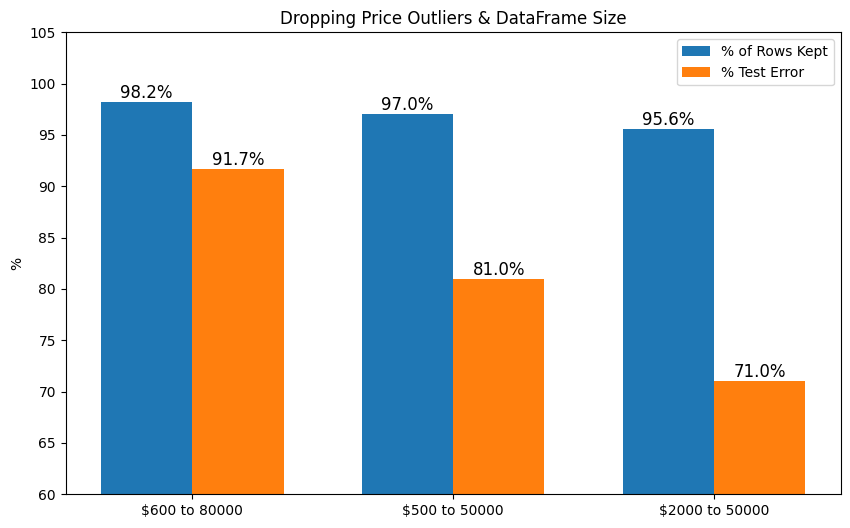

In [501]:
# Data
labels = labes

df_size = lengths
df_errs = errs

df_size_p = np.array([round((len(df_6_80)/len(df17)), 3), round((len(df_5_50)/len(df19)),3), round((len(df_20_50)/len(df19)),3)])
size_p = df_size_p * 100

df_err_p = np.array([round((1-((7281.4-6680.6))/7281.4),3),round(1-((7281.4-5865.7))/7281.4,2),round(1-((7281.4-5161.8)/7281.4),2)])
err_p = df_err_p * 100

# Number of groups
n_groups = len(labels)

# Positions of the bars on the x-axis
bar_width = 0.35  # Width of the bars
index = np.arange(n_groups)  # The label locations

# Plot bars
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(index - bar_width/2, size_p, bar_width, label='% of Rows Kept')
bars2 = ax.bar(index + bar_width/2, err_p, bar_width, label='% Test Error')

for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, round(height,1), f'{height}%', 
            ha='center', va='bottom', fontsize=12, color='black')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2,  round(height,1), f'{height}%', 
            ha='center', va='bottom', fontsize=12, color='black')
   
ax.set_ylabel('%')
ax.set_title('Dropping Price Outliers & DataFrame Size')
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(60, 105) #(min(df_size_p) - 0.05, max(df_size_p) + 0.05)


# Display plot
plt.show()


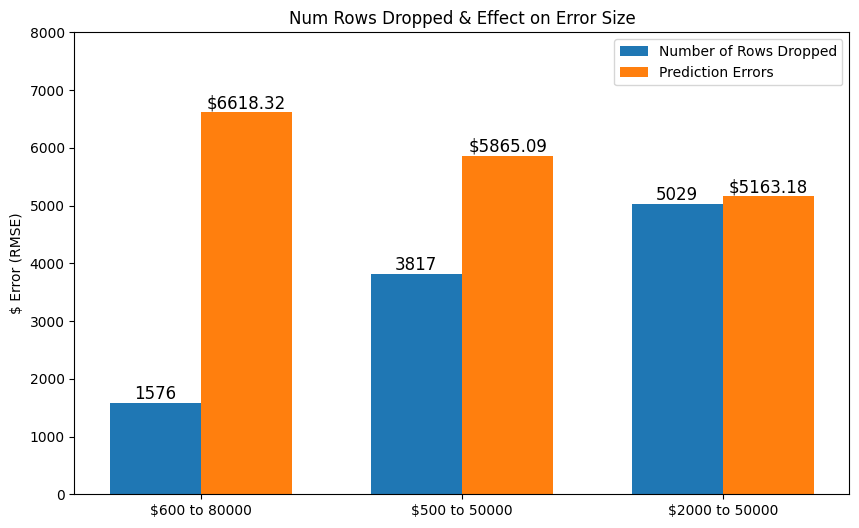

In [502]:
labels = labes

df_size = [len(df17) - length for length in lengths]
df_errs = errs 


# Number of groups
n_groups = len(labels)

# Positions of the bars on the x-axis
bar_width = 0.35  # Width of the bars
index = np.arange(n_groups)  # The label locations

# Plot bars
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(index - bar_width/2, df_size, bar_width, label='Number of Rows Dropped')
bars2 = ax.bar(index + bar_width/2, df_errs, bar_width, label='Prediction Errors')

for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
            ha='center', va='bottom', fontsize=12, color='black')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'${height}', 
            ha='center', va='bottom', fontsize=12, color='black')
   
ax.set_ylabel('$ Error (RMSE)')
ax.set_title('Num Rows Dropped & Effect on Error Size')
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0,8000)


# Display plot
plt.show()


In [604]:
import xgboost as xgb

def df_xg_c(df, fine_tuned_d):

    cats = ['Turbo', 'FuelTypePrimary', 'VehicleType', 'EngineCylinders', 'BodyClass', 'DriveType','GVWR', 'Doors', 'paint_color']
    numbers = ['odometer', 'ModelYear', 'displ','price']


    df_c = pd.get_dummies(df[cats].astype(str))
    df_new = pd.concat([df_c, df[numbers]], axis=1)
    X = df_new.drop(['price'], axis=1)
    y = df_new['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)  
    
    params = fine_tuned_d

    xgb_model = xgb.XGBRegressor(**params)
    xgb_model.fit(X_train, y_train)
    
    y_test_pred = xgb_model.predict(X_test)
    y_train_pred = xgb_model.predict(X_train)

    print('test pred mean: ' + str(np.mean(y_test_pred)))
    print('test pred min: ' + str(np.min(y_test_pred)))
    print('test pred max: ' + str(np.max(y_test_pred)))
    
    print('\n')

    print('train pred mean: ' + str(np.mean(y_train_pred)))
    print('train pred min: ' + str(np.min(y_train_pred)))
    print('train pred max: ' + str(np.max(y_train_pred)))
    
    print('\n')
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    
    # Print metrics
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Train MAE: {train_mae:.4f}")

    print('\n')
    
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    
    # Print metrics
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    
    print('\n')

    importances = xgb_model.feature_importances_

    # Create a DataFrame for easier plotting
    importances_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    # Plot feature importances
    plt.figure(figsize=(30, 18))
    plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.title('Feature Importances from XGBRegressor')
    plt.gca().invert_yaxis()  # To display the highest importance at the top
    plt.show()
    
    test_df = X_test.copy() # Copy the test features to a new DataFrame
    test_df['actual'] = y_test.values  # Add actual values
    test_df['predicted'] = y_test_pred  # Add predicted values
    test_df['errors'] = test_df['actual'] - test_df['predicted']

    train_df = X_train.copy() # Copy the test features to a new DataFrame
    train_df['actual'] = y_train.values  # Add actual values
    train_df['predicted'] = y_train_pred  # Add predicted values
    train_df['errors'] = train_df['actual'] - train_df['predicted']
    
    full_df = pd.concat([train_df, test_df])
        
    return full_df, train_rmse, test_rmse, importances_df

test pred mean: 18827.633
test pred min: 1135.0085
test pred max: 79357.43


train pred mean: 18830.338
train pred min: 995.3106
train pred max: 79519.7


Train MSE: 22510822.6207
Train RMSE: 4744.5572
Train R²: 0.8689
Train MAE: 2898.5936


Test MSE: 24866890.6428
Test RMSE: 4986.6713
Test R²: 0.8554
Test MAE: 2965.1021




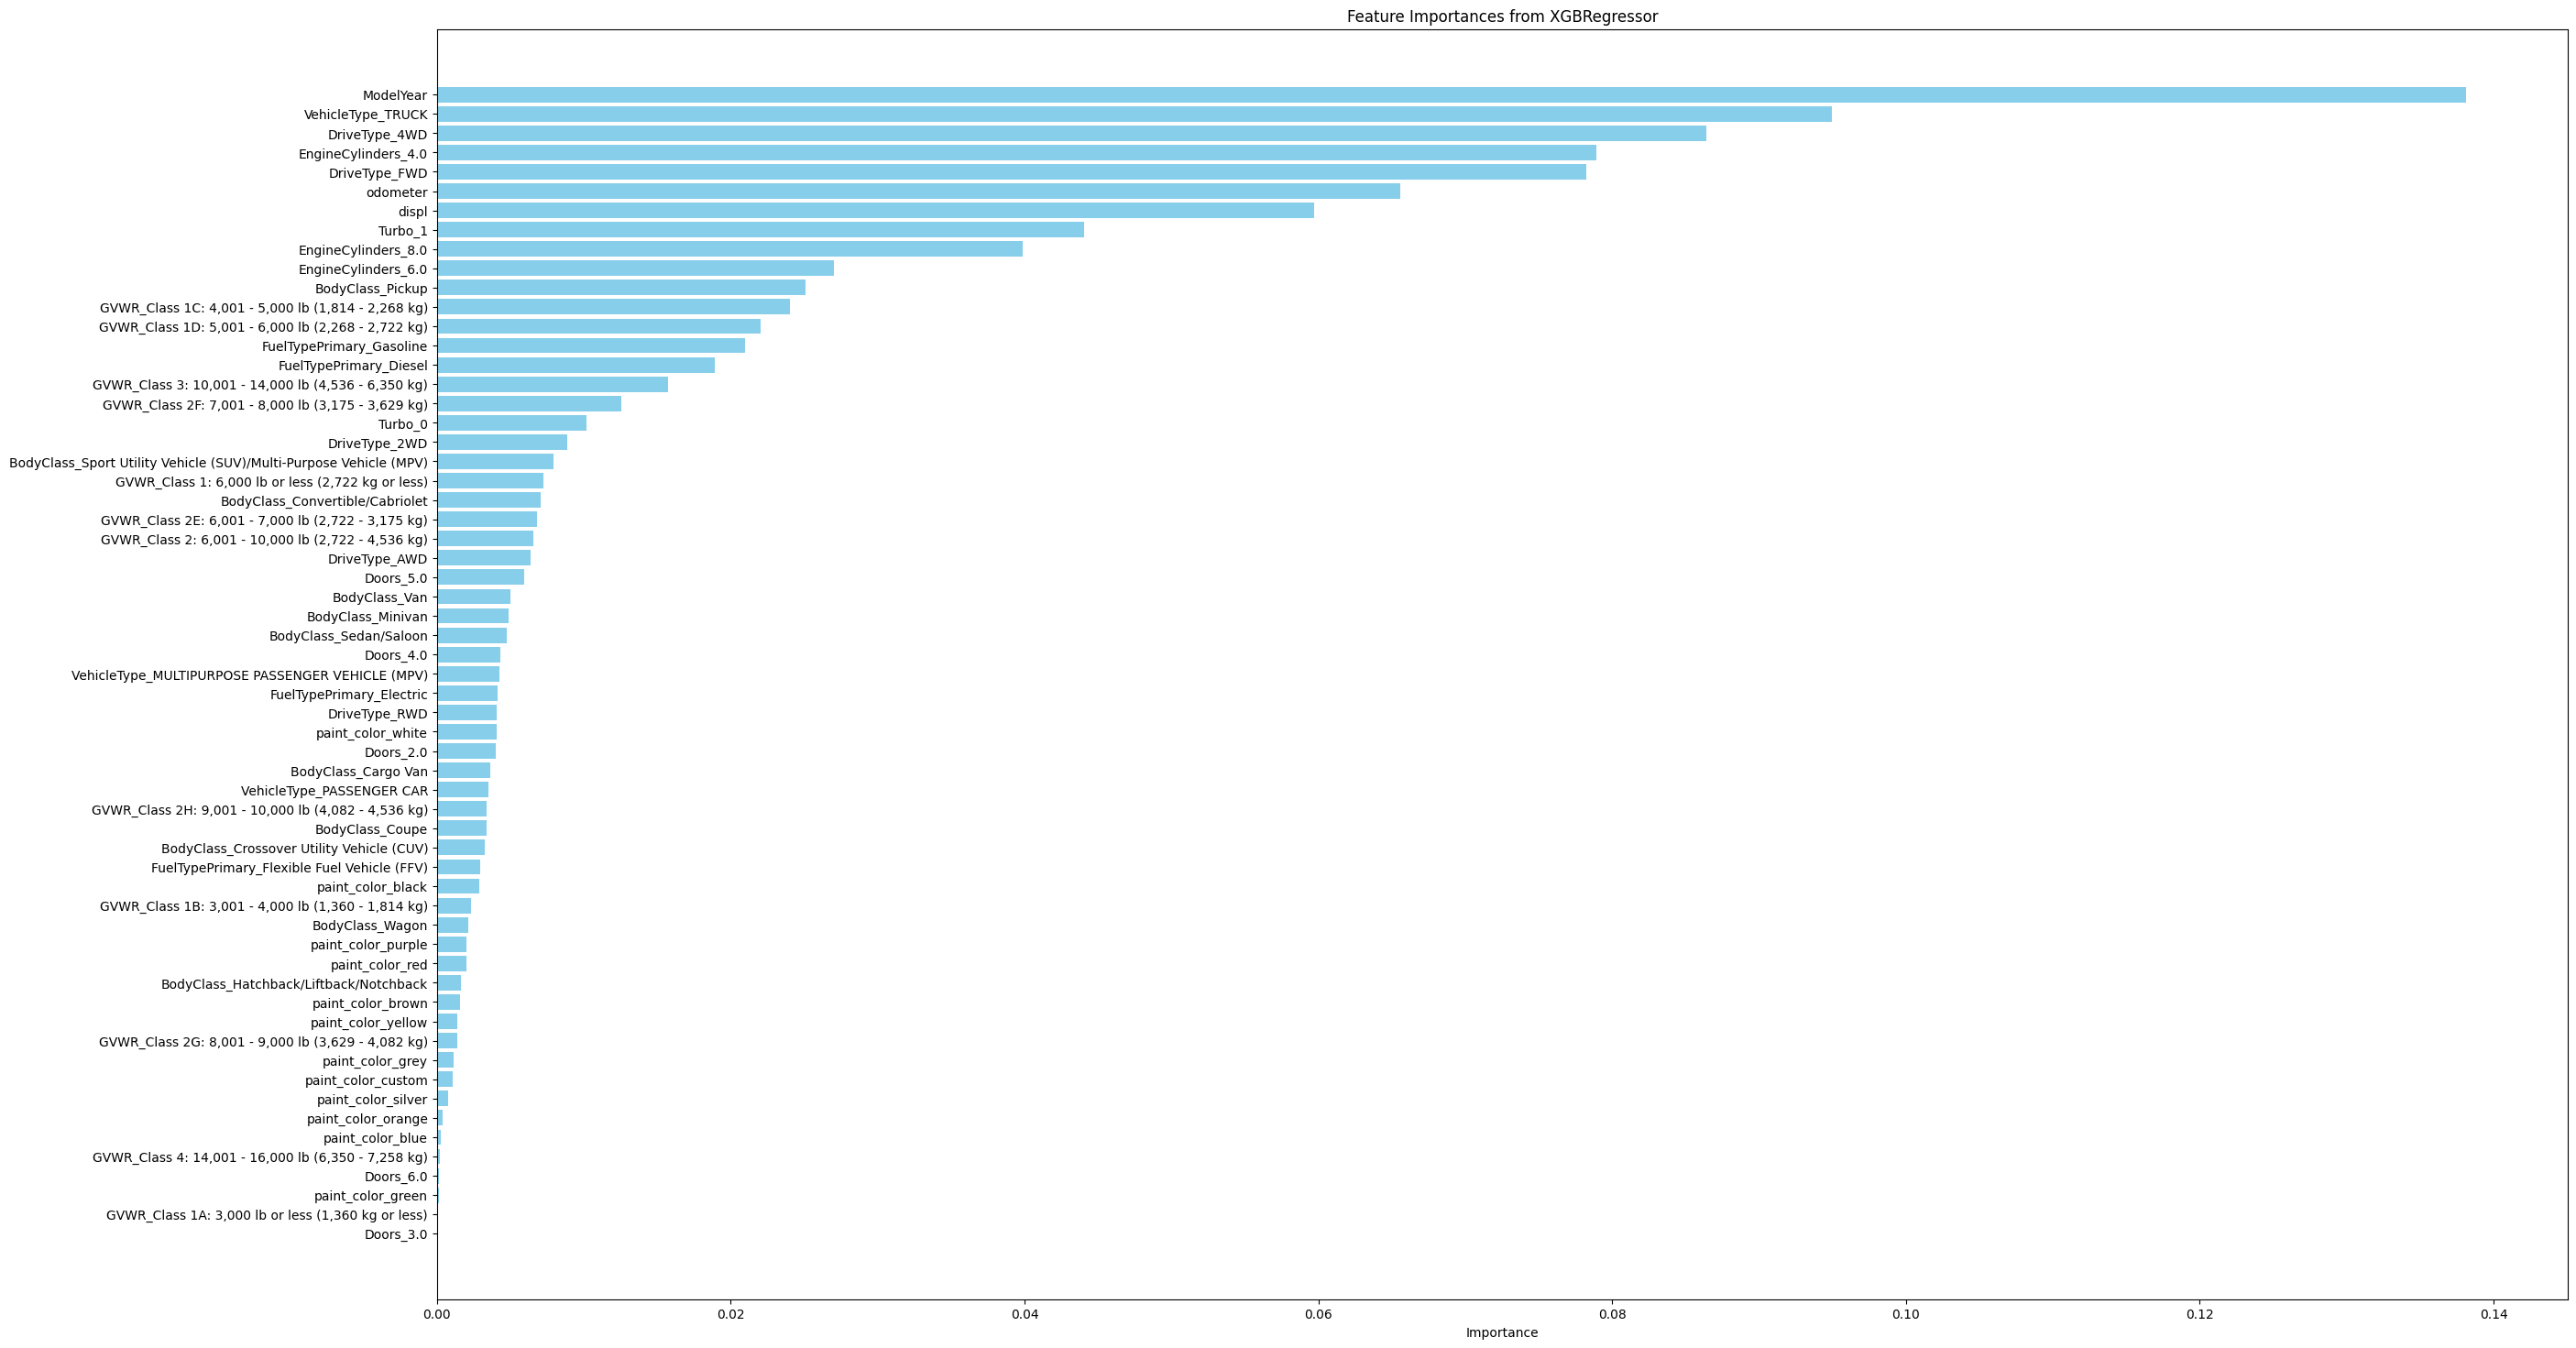

In [605]:
xg_df, xg_tr_rmse, xg_te_rmse, xg_imp = df_xg_c(df_6_80, {'n_estimators': 125, 'max_depth': 4, 'colsample_bytree' : 0.8})

In [ ]:
dfls = [df_468_f, df_6_80, df_5_50, df_20_50]

linear_test_scores = []
xg_test_scores = []
labels = []
sizes = []

for df in dfls:
    lin_rmse = df_to_model_u(df)[1]
    linear_test_scores.append(round(lin_rmse,2))
    xg_rmse = df_xg_c(df, {'n_estimators': 125, 'max_depth': 4, 'colsample_bytree' : 0.8})[2]
    xg_test_scores.append(round(xg_rmse,2))
    
    label = '$' + str(df.price.min()) + ' to ' + str(df.price.max())
    labels.append(label)
    
    sizes.append(len(dfls[0]) - len(df))
    
    

In [607]:
xg_test_scores

[5702.93, 4986.67, 4606.95, 3653.52]

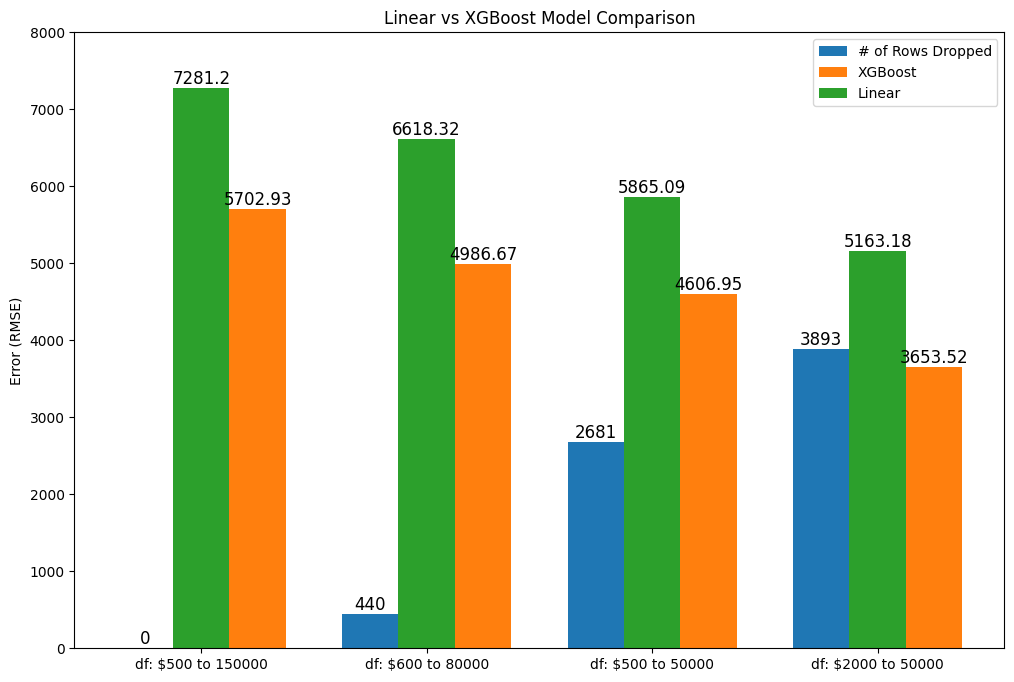

In [609]:
n_groups = len(labels)

# Positions of the bars on the x-axis
bar_width = 0.25  # Width of the bars
index = np.arange(n_groups)  # The label locations

# Plot bars
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars with adjusted positions to avoid overlap
sizeb = ax.bar(index - bar_width, sizes, bar_width, label='# of Rows Dropped')
xg_b = ax.bar(index + bar_width, xg_test_scores, bar_width, label='XGBoost')
linear_bars = ax.bar(index, linear_test_scores, bar_width, label='Linear')

# Adding text annotations
for bar in sizeb:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
            ha='center', va='bottom', fontsize=12, color='black')

for bar in xg_b:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
            ha='center', va='bottom', fontsize=12, color='black')

for bar in linear_bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
            ha='center', va='bottom', fontsize=12, color='black')

# Formatting plot
ax.set_ylabel('Error (RMSE)')
ax.set_title('Linear vs XGBoost Model Comparison')
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0, 8000)

# Display plot
plt.show()


In [610]:
len(df_468_f) -len(df_6_80)

440

In [536]:
df_6_80[['state','EngineConfiguration','Make','Model', 'state', 'condition']].isnull().sum().to_dict()

{'state': 0,
 'EngineConfiguration': 31942,
 'Make': 0,
 'Model': 0,
 'condition': 40669}

In [537]:
df_6_80.EngineConfiguration.value_counts(dropna=False)

EngineConfiguration
V-Shaped                        34200
NaN                             31942
In-Line                         21241
Horizontally opposed (boxer)      375
Name: count, dtype: int64

In [538]:
df_6_80.condition.value_counts(dropna=False)

condition
NaN          40669
excellent    23679
good         19753
like new      3151
fair           506
Name: count, dtype: int64

In [539]:
df_6_80.Make.value_counts()

Make
FORD               13734
CHEVROLET          10398
TOYOTA              8363
HONDA               5267
NISSAN              4549
JEEP                4283
DODGE               3735
GMC                 3315
BMW                 3183
HYUNDAI             2776
MERCEDES-BENZ       2672
SUBARU              2644
RAM                 2599
KIA                 2280
LEXUS               1970
VOLKSWAGEN          1775
AUDI                1713
CADILLAC            1498
CHRYSLER            1474
MAZDA               1244
BUICK               1169
ACURA               1134
INFINITI            1046
LINCOLN              785
LAND ROVER           607
MITSUBISHI           476
VOLVO                468
MINI                 448
PONTIAC              390
PORSCHE              329
JAGUAR               292
SATURN               214
MERCURY              201
FIAT                 157
ALFA ROMEO           132
MASERATI             104
GENESIS               82
SUZUKI                74
SAAB                  60
HUMMER              

In [540]:
df_n = df_6_80[df_6_80['Make'].isin(list({k:v for (k,v) in df_468_f.Make.value_counts().to_dict().items() if v > 7}.keys()))]

In [541]:
print('Old # of Makes: ' + str(len(df_6_80.Make.unique())))
print('New # of Makes: ' + str(len(df_n.Make.unique())))
print('# Rows Dropped: ' + str(len(df_6_80)-len(df_n)))

Old # of Makes: 51
New # of Makes: 42
# Rows Dropped: 21


In [542]:
df_n.state.value_counts(dropna=False)

state
ca    11475
fl     5912
tx     4221
or     4110
co     3516
wa     3191
id     3175
oh     3111
az     3015
nj     3000
ny     2770
ia     2553
mi     2451
il     2336
nc     2115
mn     2068
wi     2025
pa     1913
tn     1739
va     1676
ma     1581
al     1373
ct     1345
ks     1337
in     1313
ak     1196
dc     1169
ga     1074
ok     1042
hi      967
mt      902
md      874
ky      859
sc      776
me      604
ar      584
mo      573
nv      569
nm      561
vt      489
la      453
nh      382
ne      265
sd      247
ri      234
ut      195
de      182
ms       82
nd       53
wy       43
wv       41
Name: count, dtype: int64

In [544]:
# 2021 Median state income source: https://www.statista.com/statistics/236804/median-family-income-in-the-united-states-by-state/

state_income_map = {
    'wy' : 86552,
    'wi' : 59787,
    'wv' : 48418,
    'wa' : 73755,
    'vt' : 61748,
    'va' : 66190,
    'ut' : 56000,
    'tx' : 59802,
    'tn' : 56616,
    'sd' : 64405,
    'sc' : 52441,
    'ri' : 64296,
    'pa' : 64042,
    'or' : 61449,
    'ok' : 53808,
    'oh' : 56995,
    'ny' : 76753,
    'nv' : 60167,
    'nm' : 50292,
    'nj' : 77009,
    'nh' : 73279,
    'ne' : 61210,
    'nd' : 64276,
    'nc' : 56095,
    'mt' : 56848,
    'ms' : 45887,
    'mo' : 55310,
    'ak' : 65677,
    'al' : 49671,
    'ar' : 50588,
    'az' : 55574,
    'ca' : 76800,
    'co' : 70715,
    'ct' : 82885,
    'dc' : 96659,
    'de' : 59846,
    'fl' : 62136,
    'ga' : 55846,
    'hi' : 60711,
    'ia' : 57080,
    'id' : 52276,
    'il' : 67165,
    'in' : 56435,
    'ks' : 58857,
    'ky' : 51298,
    'la' : 54181,
    'ma' : 83593,
    'md' : 69710,
    'me' : 58272,
    'mi' : 45887,
    'mn' : 66232}

In [545]:
df_n['state_income'] = df_n['state'].map(state_income_map)   

C:\Users\pgrts\AppData\Local\Temp\ipykernel_12940\524750908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['state_income'] = df_n['state'].map(state_income_map)


(array([ 5092., 11162., 21638., 16095.,  8794.,  3573., 17245.,  2926.,
           43.,  1169.]),
 array([45887. , 50964.2, 56041.4, 61118.6, 66195.8, 71273. , 76350.2,
        81427.4, 86504.6, 91581.8, 96659. ]),
 <BarContainer object of 10 artists>)

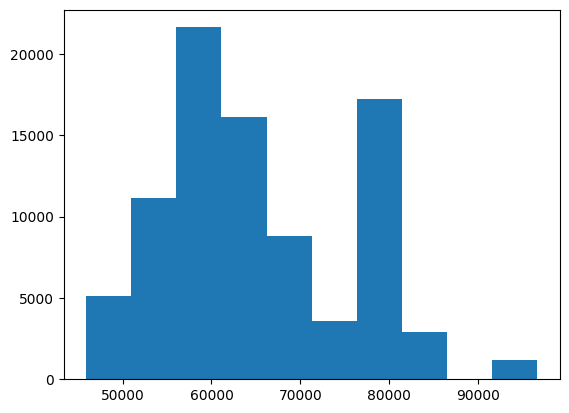

In [546]:
plt.hist(df_n['state_income'])

In [547]:
print(str(len(df_n.region.unique())) + ' unique regions is potentially too many. \n' + 
str(len(df_n.Make.unique())) + ' unique Makes is reasonable. \n' +
str(len(df_n.Model.unique())) + ' unique Models is potentially too many. \n' + 
'DataFrame Length: ' + str(len(df_n)))

399 unique regions is potentially too many. 
42 unique Makes is reasonable. 
775 unique Models is potentially too many. 
DataFrame Length: 87737


In [553]:
df_n['Model'].value_counts()

Model
F-150        3669
Silverado    3361
1500         1566
Sierra       1558
Wrangler     1479
             ... 
W-Series        1
Regency         1
LTD             1
NSX             1
Fleetwood       1
Name: count, Length: 775, dtype: int64

In [600]:
def df_xg_new(df, fine_tuned_d):

    cats = ['Turbo', 'FuelTypePrimary', 'VehicleType', 'EngineCylinders', 'BodyClass', 'DriveType','GVWR', 'Doors', 'paint_color',
           'state', 'EngineConfiguration', 'Make']
    
    numbers = ['odometer', 'ModelYear', 'displ', 'state_income', 'price']


    df_c = pd.get_dummies(df[cats].astype(str))
    df_new = pd.concat([df_c, df[numbers]], axis=1)
    X = df_new.drop(['price'], axis=1)
    y = df_new['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)  
    
    params = fine_tuned_d

    xgb_model = xgb.XGBRegressor(**params)
    xgb_model.fit(X_train, y_train)
    
    y_test_pred = xgb_model.predict(X_test)
    y_train_pred = xgb_model.predict(X_train)

    print('test pred mean: ' + str(np.mean(y_test_pred)))
    print('test pred min: ' + str(np.min(y_test_pred)))
    print('test pred max: ' + str(np.max(y_test_pred)))
    
    print('\n')

    print('train pred mean: ' + str(np.mean(y_train_pred)))
    print('train pred min: ' + str(np.min(y_train_pred)))
    print('train pred max: ' + str(np.max(y_train_pred)))
    
    print('\n')
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    
    # Print metrics
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Train MAE: {train_mae:.4f}")

    print('\n')
    
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    
    # Print metrics
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    
    print('\n')

    importances = xgb_model.feature_importances_

    # Create a DataFrame for easier plotting
    importances_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    # Plot feature importances
    plt.figure(figsize=(25, 50))
    plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.title('Feature Importances from XGBRegressor')
    plt.gca().invert_yaxis()  # To display the highest importance at the top
    plt.show()
    
    test_df = X_test.copy() # Copy the test features to a new DataFrame
    test_df['actual'] = y_test.values  # Add actual values
    test_df['predicted'] = y_test_pred  # Add predicted values
    test_df['errors'] = test_df['actual'] - test_df['predicted']

    train_df = X_train.copy() # Copy the test features to a new DataFrame
    train_df['actual'] = y_train.values  # Add actual values
    train_df['predicted'] = y_train_pred  # Add predicted values
    train_df['errors'] = train_df['actual'] - train_df['predicted']
    
    full_df = pd.concat([train_df, test_df])
        
    return full_df, train_rmse, test_rmse, importances_df

In [548]:
df_n.columns

Index(['ABS', 'ActiveSafetySysNote', 'AdaptiveCruiseControl',
       'AdaptiveDrivingBeam', 'AirBagLocCurtain', 'AirBagLocFront',
       'AirBagLocKnee', 'AirBagLocSeatCushion', 'AirBagLocSide',
       'AutoReverseSystem',
       ...
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'Year', 'displ', 'state_income'],
      dtype='object', length=112)

In [ ]:
df_n.price.describe()

In [ ]:
err_df_n, tr_rmse_n, te_rmse_n, te_impo_df_n = df_xg_new(df_n, {'n_estimators': 125, 'max_depth': 4, 'colsample_bytree' : 0.8})

In [ ]:
err_df_o, tr_rmse_o, te_rmse_o, impo_df_o = df_xg_c(df_n, {'n_estimators': 125, 'max_depth': 4, 'colsample_bytree' : 0.8})

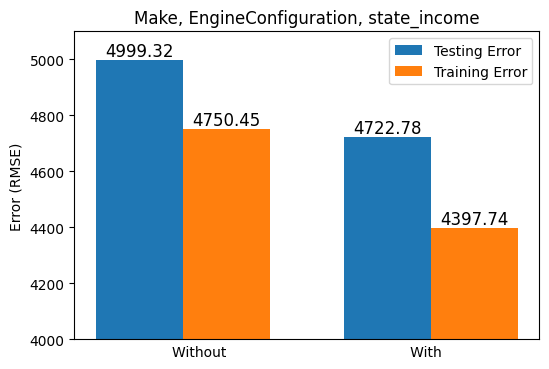

In [1508]:
xg_train_scores = [round(tr_rmse_o,2), round(tr_rmse_n,2)]
xg_test_scores = [round(te_rmse_o,2), round(te_rmse_n,2)]
#labels = ['Train Error', 'Test Error']

n_bars_per_group = len(xg_train_scores)
bar_width = 0.35  # Width of each bar
index = np.arange(len(xg_train_scores))  # x locations for the groups

# Plot bars
fig, ax = plt.subplots(figsize=(6, 4))

# Plot bars with adjusted positions to avoid overlap
xg_te_bars = ax.bar(index - bar_width / 2, xg_test_scores, bar_width, label='Testing Error')
xg_tr_bars = ax.bar(index + bar_width / 2, xg_train_scores, bar_width,label ='Training Error')

for xg_bars in [xg_tr_bars, xg_te_bars]:
    # Adding text annotations
    for bar in xg_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
                ha='center', va='bottom', fontsize=12, color='black')


# Formatting plot
ax.set_ylabel('Error (RMSE)')
ax.set_xlabel('Without                                          With')
ax.legend()
ax.set_title('Make, EngineConfiguration, state_income')
ax.set_ylim(4000, 5100)
plt.xticks([])
# Display plot
plt.show()


In [689]:
print('      Level of Overfitting \n  (difference between train and test errors):\n')
print('  Without state, EngineConfiguration, state_income, and state:\n     Te/Tr Diff: ' + str(round(100*(te_rmse_o - tr_rmse_o)/(te_rmse_o),2))+'% ($' + str(round((te_rmse_o - tr_rmse_o),2)) +')')
print('\n  With state, EngineConfiguration, state_income, and state:\n     Te/Tr Diff: ' + str(round(100*(te_rmse_n - tr_rmse_n)/(te_rmse_n),2))+'% ($' + str(round((te_rmse_n - tr_rmse_n),2)) +')')

      Level of Overfitting 
  (difference between train and test errors):

  Without state, EngineConfiguration, state_income, and state:
     Te/Tr Diff: 4.98% ($248.87)

  With state, EngineConfiguration, state_income, and state:
     Te/Tr Diff: 6.88% ($325.03)


In [406]:
# Additional Features Used: 'Model', 'EngineConfiguration', 'state', 'state_income'
# 'Make' excluded

grid_search_xg(df_n_g)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 250, 'subsample': 0.8}
Best RMSE score on training data:  4372.567785825424
Test RMSE:  4337.41633343224


In [407]:
# Slightly different grid search parms

grid_search_xg_b(df_n_g)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.125, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 1.0}
Best RMSE score on training data:  4757.620137038926
Test RMSE:  4677.638456356922


In [585]:
df_n_g = df_n[['Turbo', 'FuelTypePrimary', 'VehicleType', 'EngineCylinders', 'BodyClass', 'DriveType','GVWR', 'Doors', 'paint_color',
           'state', 'EngineConfiguration', 'Make', 'Model','odometer', 'ModelYear', 'displ', 'state_income','price']]

In [692]:
err_n_df_1, tr_n_1, te_n_1, impo_n_df_1 = df_xg_mk_mdl(df_n_g, {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 250, 'subsample': 0.8})

test pred mean: 18976.129
test pred min: 557.52576
test pred max: 78630.75


train pred mean: 18809.57
train pred min: 328.4909
train pred max: 80728.8


Train MSE: 11953548.0173
Train RMSE: 3457.3903
Train R²: 0.9302
Train MAE: 2045.8765


Test MSE: 19395146.3277
Test RMSE: 4403.9921
Test R²: 0.8882
Test MAE: 2383.9162




In [ ]:
Comparison to Old:

test pred mean: 18970.234
test pred min: 1891.6066
test pred max: 78147.73


train pred mean: 18811.68
train pred min: 908.64764
train pred max: 79389.95


Train MSE: 16776885.9077
Train RMSE: 4095.9597
Train R²: 0.9020
Train MAE: 2475.0005


Test MSE: 23021829.6507
Test RMSE: 4798.1069
Test R²: 0.8673
Test MAE: 2754.1147




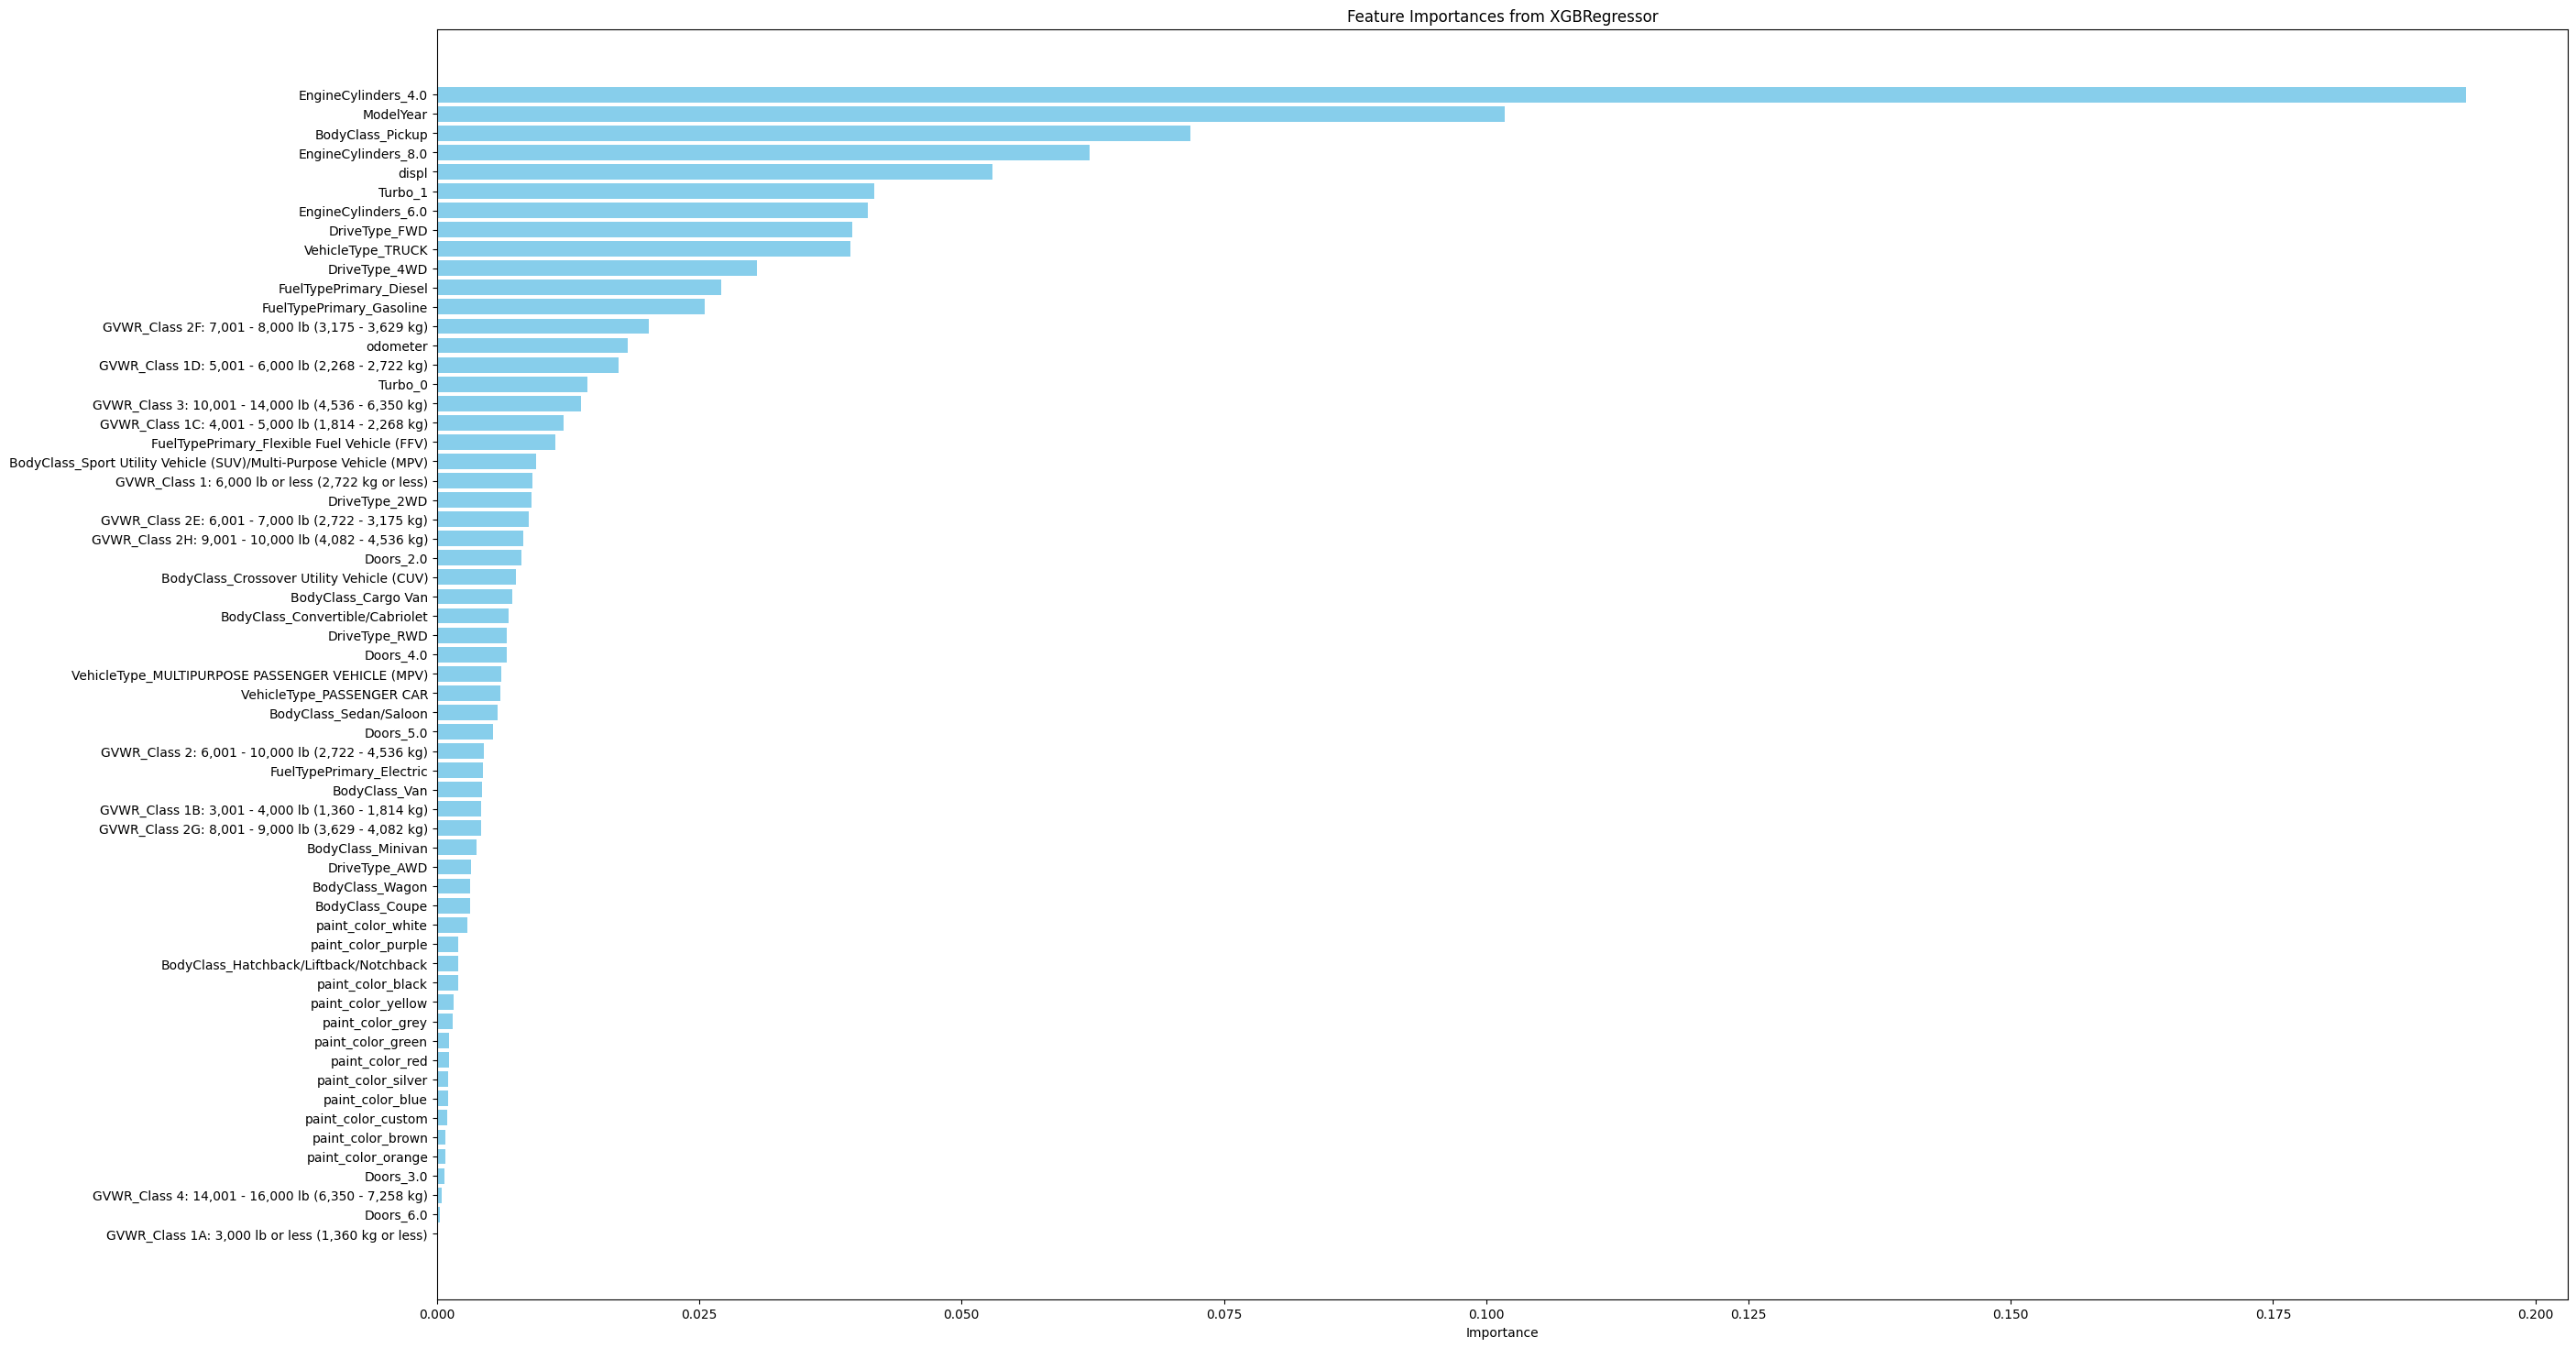

In [695]:
err_o_df_1, tr_o_1, te_o_1, impo_o_df_1 = df_xg_c(df_n_g, {'colsample_bytree': 0.8, 'learning_rate': 0.125, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 1.0})

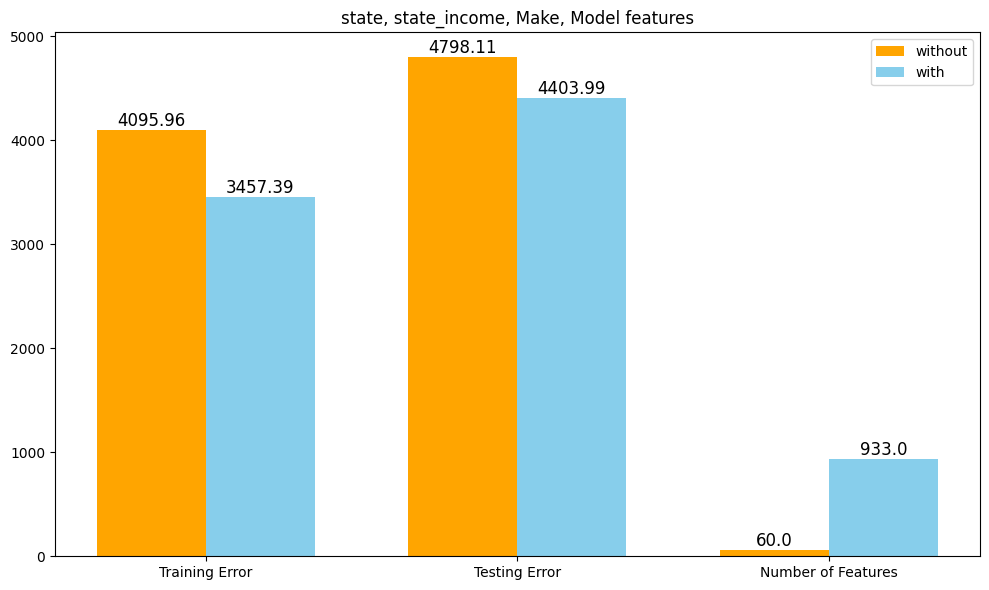

In [698]:
# Sample data
groups = ['Training Error', 'Testing Error', 'Number of Features']
old = [round(x,2) for x in [tr_o_1, te_o_1, len(impo_o_df_1)]]  # Values for Category 1 across groups
new = [round(x,2) for x in [tr_n_1, te_n_1, len(impo_n_df_1)]]  # Values for Category 2 across groups

n_groups = len(groups)
bar_width = 0.35  # Width of the bars
index = np.arange(n_groups)  # The label locations for groups

# Plot bars
fig, ax = plt.subplots(figsize=(10, 6))

# Create side-by-side bars for each group
bars1 = ax.bar(index - bar_width/2, old, bar_width, label='without', color='orange')
bars2 = ax.bar(index + bar_width/2, new, bar_width, label='with', color='skyblue')

# Add labels and title
ax.set_title('state, state_income, Make, Model features')
ax.set_xticks(index)
ax.set_xticklabels(groups)

# Add legend
ax.legend(loc='upper right')

# Add text annotations
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
            ha='center', va='bottom', fontsize=12, color='black')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
            ha='center', va='bottom', fontsize=12, color='black')

# Adjust layout to fit the plot
plt.tight_layout()

# Show plot
plt.show()

In [699]:
print('      Level of Overfitting \n  (difference between train and test errors):\n')
print('  Without New Features:\n     Te/Tr Diff: ' + str(round(100*(te_o_1 - tr_o_1)/(te_o_1),2))+'% ($' + str(round((te_o_1 - tr_o_1),2)) +')')
print('\n  With New Features:\n     Te/Tr Diff: ' + str(round(100*(te_n_1 - tr_n_1)/(te_n_1),2))+'% ($' + str(round((te_n_1 - tr_n_1),2)) +')')

      Level of Overfitting 
  (difference between train and test errors):

  Without New Features:
     Te/Tr Diff: 14.63% ($702.15)

  With New Features:
     Te/Tr Diff: 21.49% ($946.6)


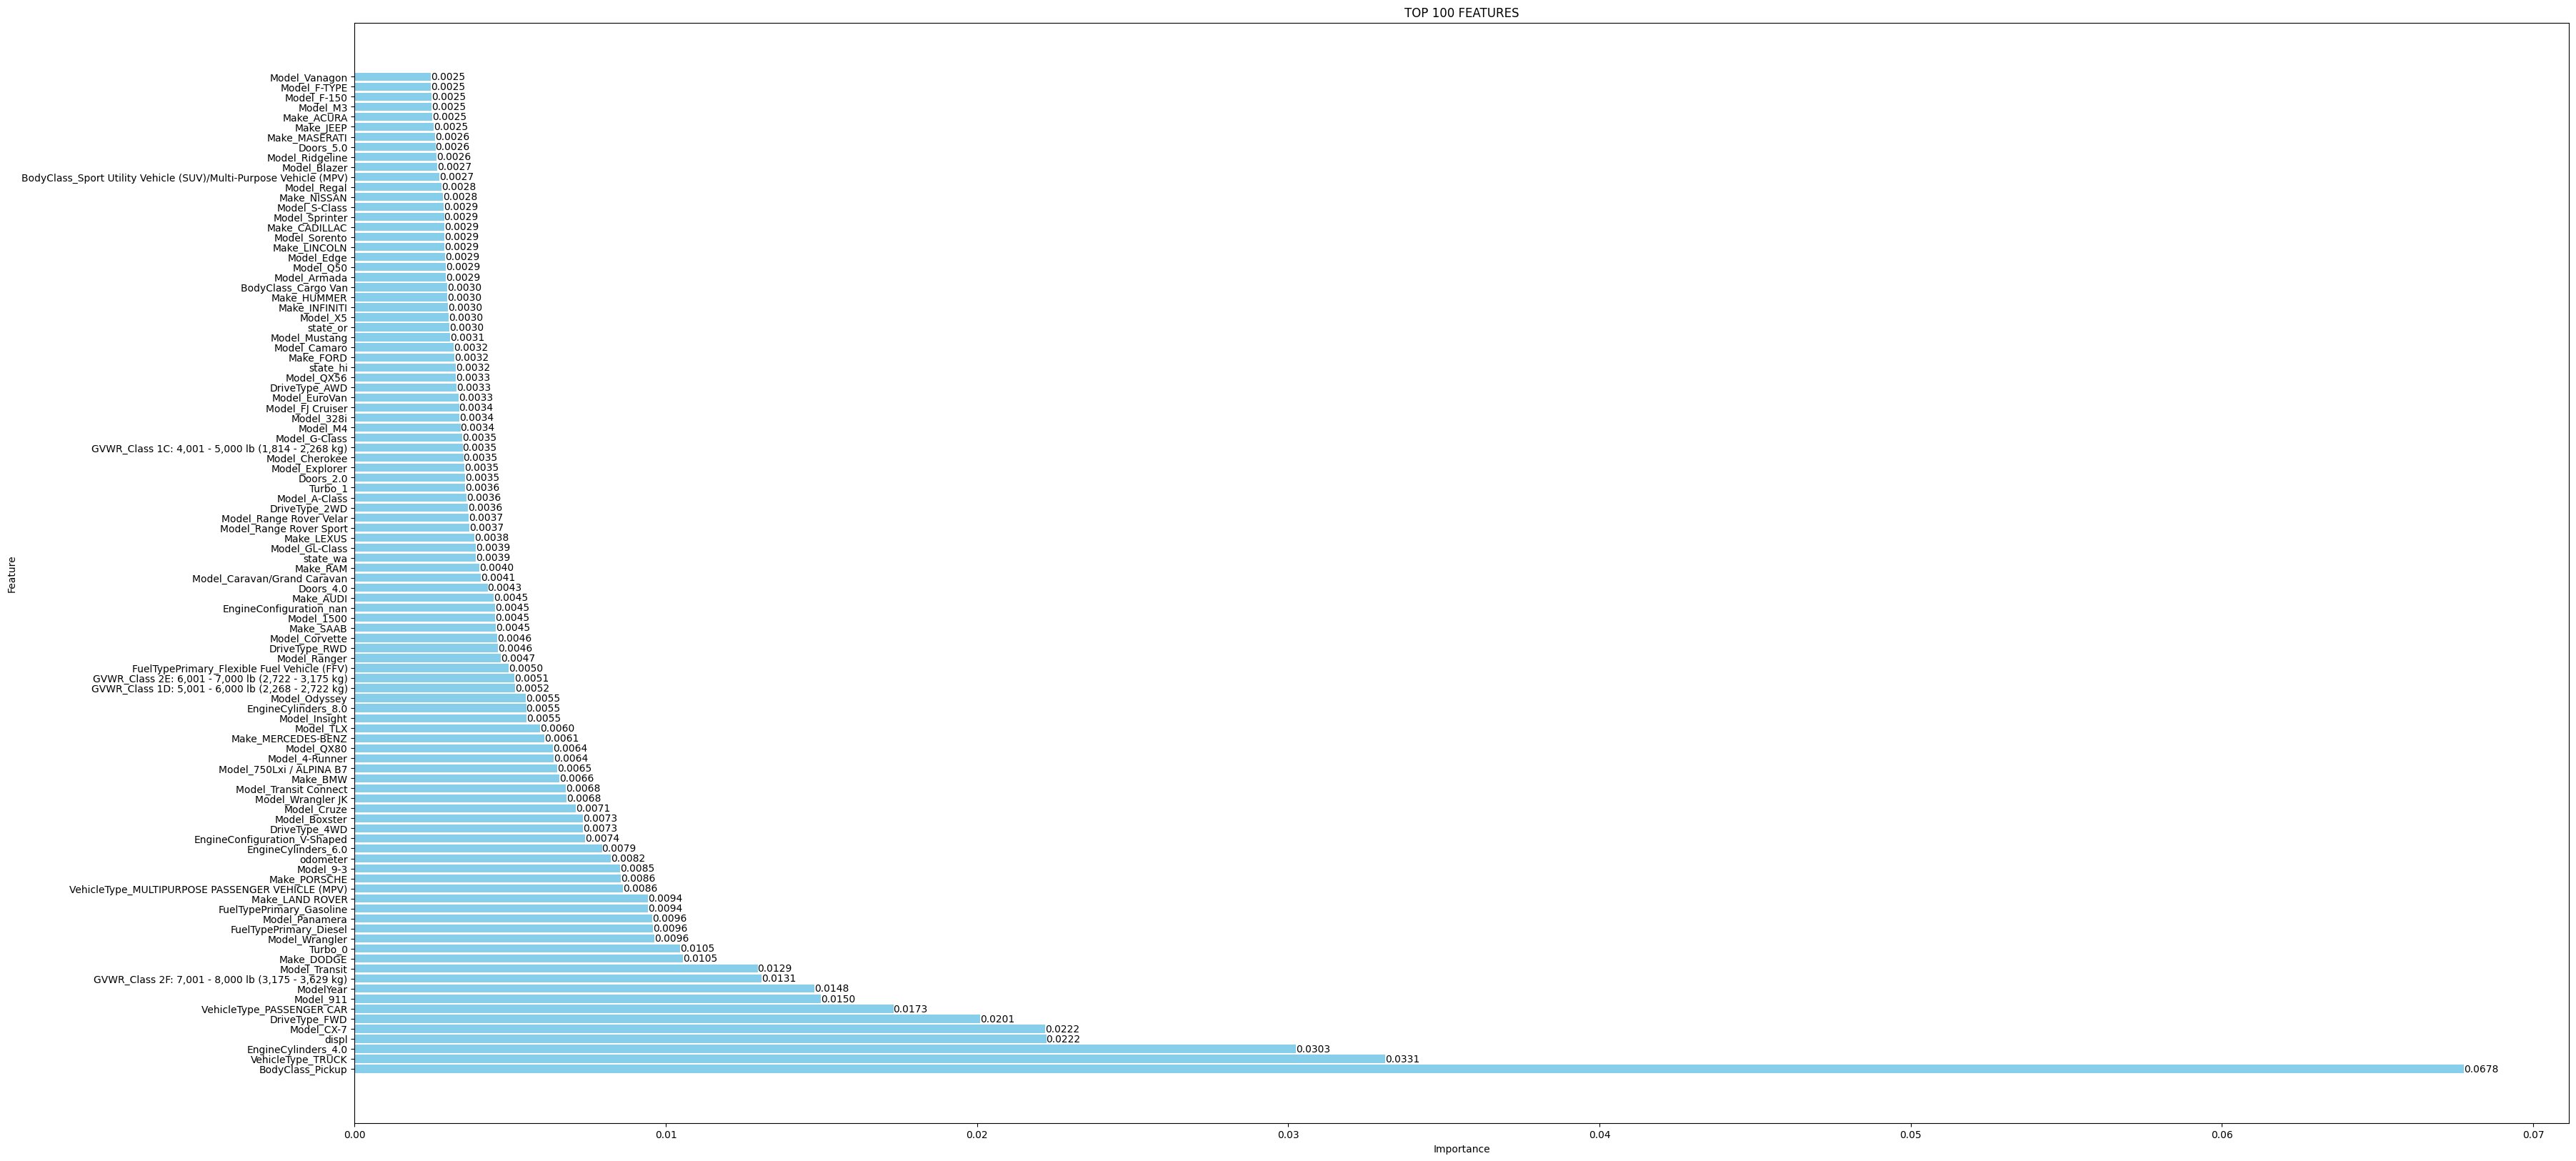

In [701]:
#Only including top 100 features: 
impo_top_100 = impo_n_df_1.sort_values(by='Importance', ascending=False).head(100)

# Plotting
plt.figure(figsize=(40, 20))

# Create horizontal bar plot
plt.barh(impo_top_100['Feature'], impo_top_100['Importance'], color='skyblue')

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('TOP 100 FEATURES')

# Add text annotations
for index, value in enumerate(impo_top_100['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center')

# Show plot
plt.show()


In [709]:
print('Top Makes (Importance): \n')
print([x.strip('Make_') for x in impo_top_100['Feature'] if 'Make_' in x])
print('\nTop Models (Importance): \n')
print([x.strip('Model_') for x in impo_top_100['Feature'] if 'Model_' in x])

Top Makes (Importance): 

['DODGE', 'LAND ROVER', 'PORSCHE', 'BMW', 'ERCEDES-BENZ', 'SAAB', 'AUDI', 'RA', 'LEXUS', 'FORD', 'INFINITI', 'HUMMER', 'LINCOLN', 'CADILLAC', 'NISSAN', 'ASERATI', 'JEEP', 'ACURA']

Top Models (Importance): 

['CX-7', '911', 'Transit', 'Wrangler', 'Panamera', '9-3', 'Boxster', 'Cruz', 'Wrangler JK', 'Transit Connect', '750Lxi / ALPINA B7', '4-Runner', 'QX80', 'TLX', 'Insight', 'Odyssey', 'Ranger', 'Corvett', '1500', 'Caravan/Grand Caravan', 'GL-Class', 'Range Rover Sport', 'Range Rover Velar', 'A-Class', 'Explorer', 'Cherok', 'G-Class', '4', '328i', 'FJ Cruiser', 'EuroVan', 'QX56', 'Camar', 'ustang', 'X5', 'Armada', 'Q50', 'Edg', 'Sorent', 'Sprinter', 'S-Class', 'Rega', 'Blazer', 'Ridgelin', '3', 'F-150', 'F-TYPE', 'Vanagon']


In [710]:
#Only including bottom 100 features: 
impo_bot_100 = impo_n_df_1.sort_values(by='Importance', ascending=True).head(100)

impo_bot_100['Feature'].unique()


array(['Model_640xi', 'Model_325Ci', 'Model_Vandura', 'Model_325i',
       'Model_S6', 'Model_Sunfire', 'Model_Venture', 'Model_325iC',
       'Model_Venue', 'Model_S40', 'Model_Veracruz', 'Model_323i',
       'Model_SL1', 'Model_318i', 'Model_SL2', 'Model_Trooper',
       'Model_UX', 'Model_Santa Fe XL', 'Model_V Conventional',
       'Model_Safari', 'Model_Sable', 'Model_V40', 'Model_S8',
       'Model_V60', 'Model_S80', 'Model_Vanden Plas', 'Model_TC',
       'Model_Stealth', 'Model_Spyder', 'Make_ISUZU', 'Model_Spider',
       'Model_Spectra', 'Make_OLDSMOBILE', 'state_wy', 'state_wv',
       'Model_Taurus X', 'Model_Tercel', 'Model_Terraza',
       'Model_Solstice', 'Model_Thunderbird', 'Model_Scion iM',
       'Model_Tribute', 'Model_Verano', 'Model_V90CC', 'Model_SL',
       'Model_SC2', 'Model_SC1', 'Model_323iC', 'Model_T100',
       'Model_V60CC', 'Model_STS', 'Model_Aviator', 'Model_Aztek',
       'Model_B-Series', 'Model_B9 Tribeca', 'Model_BRZ',
       'Model_F-150 Heritag

In [478]:
impo_n_df.to_csv('new_importances1.csv',index=False)

In [730]:
identifiers = ['VIN', 'VehicleDescriptor', 'id', 'url']

extra_cl = ['region', 'manufacturer', 'model', 'cylinders', 'fuel', 'transmission', 'drive', 'size', 'type', 'description', 'state']

useless_cl = ['county', 'lat', 'long', 'Year', 'year', 'title_status', 'image_url', 'region_url', 'posting_date']
              
too_many_unique_vals = ['OtherEngineInfo', 'OtherRestraintSystemInfo','EngineModel', 'PlantCity', 'PlantCompanyName', 
                        'Model', 'Trim','Series','Trim2','Series2']                    

duplicate = ['DisplacementCC', 'EngineManufacturer', 'GVWR_to', 'Manufacturer', 'PlantCountry', 'PlantState']

extra_info = ['ActiveSafetySysNote', 'EngineCycles', 'ManufacturerId','Note','Wheels']

good_number_info = ['BasePrice', 'EngineHP', 'EngineHP_to', 'displ', 'TopSpeedMPH', 'WheelBaseShort', 
                    'WheelSizeFront', 'WheelSizeRear', 'odometer','price','ModelYear', 'state_income']

good_categoricals = [x for x in df_n.columns if x not in identifiers+extra_cl+useless_cl+too_many_unique_vals+duplicate+extra_info+good_number_info]

In [727]:
'displ' in df_n

True

In [731]:
for each in good_categoricals:
    print(df_n[each].value_counts(dropna=False))
    print('\n')    

ABS
NaN         65873
Standard    21846
Optional       18
Name: count, dtype: int64


AdaptiveCruiseControl
NaN              80221
Optional          3983
Standard          3494
Not Available       39
Name: count, dtype: int64


AdaptiveDrivingBeam
NaN              80638
Standard          3664
Optional          3363
Not Available       72
Name: count, dtype: int64


AirBagLocCurtain
NaN                               43558
All Rows                          19955
1st and 2nd Rows                  17906
1st Row (Driver and Passenger)     4521
1st and 2nd and 3rd Rows           1796
Driver Seat Only                      1
Name: count, dtype: int64


AirBagLocFront
1st Row (Driver and Passenger)    78806
NaN                                8818
Driver Seat Only                    113
Name: count, dtype: int64


AirBagLocKnee
NaN                               68359
1st Row (Driver and Passenger)    10682
Driver Seat Only                   8030
Passenger Seat Only                 666
Name: coun

In [ ]:
for sec in df_n.FuelTypeSecondary.dropna().unique():
    print('Secondary Fuel: ' + sec)
    print(df_n[df_n.FuelTypeSecondary == sec]['FuelTypePrimary'].value_counts(dropna=False))
    print('\n')

In [738]:
df_n[df_n.FuelTypePrimary == 'Electric']['FuelTypeSecondary'].value_counts()

FuelTypeSecondary
Gasoline    354
Name: count, dtype: int64

In [717]:
df_n_1 = df_n.copy()

In [718]:
df_n_1.loc[ df_n_1[df_n_1.FuelTypeSecondary == 'Ethanol (E85)'].index, 'FuelTypePrimary'] = 'Flexible Fuel Vehicle (FFV)'

In [719]:
df_n_1.loc[ df_n_1[df_n_1.FuelTypeSecondary == 'Electric'].index, 'FuelTypePrimary'] = 'Hybrid'

In [721]:
df_n_1.loc[ df_n_1[df_n_1.FuelTypeSecondary == 'Flexible Fuel Vehicle (FFV)'].index, 'FuelTypePrimary'] = 'Flexible Fuel Vehicle (FFV)'

In [723]:
df_n_1.loc[ df_n_1[(df_n_1.FuelTypePrimary == 'Electric') & (df_n_1.FuelTypeSecondary == 'Gasoline')].index, 'FuelTypePrimary'] = 'Hybrid (HEV)'

In [724]:
df_n_1.loc[ df_n_1[df_n_1.FuelTypeSecondary == 'Compressed Natural Gas (CNG)'].index, 'FuelTypePrimary'] = 'Flexible Fuel Vehicle (FFV)'

In [754]:
good_categoricals.remove('FuelTypeSecondary')

In [747]:
useful_cl = ['region', 'state', 'cylinders', 'fuel', 'transmission', 'drive', 'size', 'type']

additional_cats =  ['Model', 'Trim','Series','Trim2','Series2']

In [735]:
good_number_info

['BasePrice',
 'EngineHP',
 'EngineHP_to',
 'displ',
 'TopSpeedMPH',
 'WheelBaseShort',
 'WheelSizeFront',
 'WheelSizeRear',
 'odometer',
 'price',
 'ModelYear',
 'state_income']

In [755]:
def xg_many_feats(df, param_d):
    
    dummies = good_categoricals + additional_cats + useful_cl
    numbers = good_number_info
    
    df_c = pd.get_dummies(df[dummies].astype(str))
    df_new = pd.concat([df_c, df[numbers]], axis=1)
    X = df_new.drop(['price'], axis=1)
    y = df_new['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)  
    
    params = param_d

    xgb_model = xgb.XGBRegressor(**params)
    xgb_model.fit(X_train, y_train)
    
    y_test_pred = xgb_model.predict(X_test)
    y_train_pred = xgb_model.predict(X_train)

    print('test pred mean: ' + str(np.mean(y_test_pred)))
    print('test pred min: ' + str(np.min(y_test_pred)))
    print('test pred max: ' + str(np.max(y_test_pred)))
    
    print('\n')

    print('train pred mean: ' + str(np.mean(y_train_pred)))
    print('train pred min: ' + str(np.min(y_train_pred)))
    print('train pred max: ' + str(np.max(y_train_pred)))
    
    print('\n')
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    
    # Print metrics
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Train MAE: {train_mae:.4f}")

    print('\n')
    
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    
    # Print metrics
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    
    print('\n')

    importances = xgb_model.feature_importances_

    # Create a DataFrame for easier plotting
    importances_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    test_df = X_test.copy() # Copy the test features to a new DataFrame
    test_df['actual'] = y_test.values  # Add actual values
    test_df['predicted'] = y_test_pred  # Add predicted values
    #test_df['errors'] = test_df['actual'] - test_df['predicted']

    train_df = X_train.copy() # Copy the test features to a new DataFrame
    train_df['actual'] = y_train.values  # Add actual values
    train_df['predicted'] = y_train_pred  # Add predicted values
    #train_df['errors'] = train_df['actual'] - train_df['predicted']
    
    full_df = pd.concat([train_df, test_df])
    full_df['errors'] = full_df['actual'] - full_df['predicted']
    full_df['error_percent'] = (full_df['actual'] - full_df['predicted']) / (full_df['actual'])
    
    return full_df, train_rmse, test_rmse, importances_df    

In [752]:
err_df, tr_er, te_er, imp_df = xg_many_feats(df_n_1, {'subsample': 0.75, 'n_estimators': 200, 'min_child_weight': 8, 'max_depth': 9, 'learning_rate': 0.08, 'lambda': 2, 'colsample_bytree': 0.6, 'colsample_bynode': 0.6, 'colsample_bylevel': 0.6})

test pred mean: 18983.807
test pred min: 507.88647
test pred max: 77566.67


train pred mean: 18810.818
train pred min: 311.72205
train pred max: 81397.05


Train MSE: 11418030.3839
Train RMSE: 3379.0576
Train R²: 0.9333
Train MAE: 2004.0731


Test MSE: 16610764.5068
Test RMSE: 4075.6306
Test R²: 0.9043
Test MAE: 2228.7988




In [ ]:
for idx in err_df[err_df['error_percent'] < -5].index:
    print(df_n_1.at[idx, 'price'])
    print(err_df.at[idx, 'predicted'])
    print(df_n_1.at[idx, 'description'])
    print('\n')

In [765]:
df_n_1[df_n_1.description.str.contains('2020 Toyota 4Runner    Brads Chevy - ☎️ Call or TEXT  ')].index

Index([69872], dtype='int64')

In [772]:
idx = 69872
print(str(idx))
print('predicted price: $' + str(err_df.loc[idx, 'predicted']))
print('actual price: $' + str(err_df.loc[idx, 'actual']))
print('error percent: ' + str(err_df.loc[idx, 'error_percent']))
print('error: ' + str(err_df.loc[idx, 'errors']))

69872
predicted price: $34101.13
actual price: $740
error percent: -45.082606630067566
error: -33361.12890625


In [768]:
df_n_1.at[69872, 'description']

"2020 Toyota 4Runner    Brads Chevy - ☎️ Call or TEXT  - ✅ $740 monthly  ☑️ View More on SALE: http://mileage.city/sesy-Mq2F   ☑️ Quick Credit Application: https://secure.dealershipids.com/creditapp/creditapp.html?id=YnJhZHNjaGV2eQ==&vehicle_id=NDI4NA==   🔴 [NEW] CLICK * More Ads by this user BUTTON*   **SPRING SAVINGS EVENT** Recent Arrival! Clean CARFAX. CARFAX One-Owner. Silver 4WD 5-Speed Automatic with Overdrive 4.0L V6 SMPI DOHC Odometer is 6164 miles below market average!   THE EASY PLACE TO SHOP!   Brads Chevy    Year: 2020 Make: TOYOTA Model: 4RUNNER Series:  VIN: JTEBU5JRXL5815476 Stock #: 8185X Condition: Used Mileage: 11,643  Exterior: Classic Silver Metallic Interior:  Body:  Transmission: Automatic Engine: 4.0L V6 SMPI DOHC Drive Train:      ✅ Good Credit, Bad Credit, First Time Buyers ? OK!      ✅ Instant Credit Approvals!   ✅ Highest Dollar Paid for Trade Ins!  We Buy Cars!   ✅ Affordable Monthly Payment's! o.a.c.   ✅ 100% Customer Satisfaction!      Address: 2775 Row R

num rows with prediction < -500% overestimation price error: 427
num rows with prediction < -1000% overestimation price error: 311
num rows with prediction < -2500% overestimation price error: 252


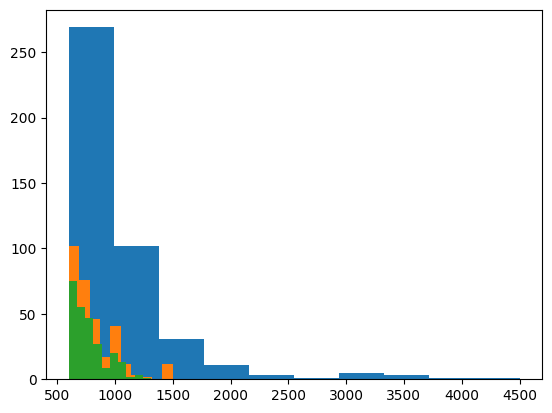

In [1510]:
for num in [-5, -10, -25]:
    print('num rows with prediction < ' + str(num) + '00% overestimation price error: ' + str(len(err_df[(err_df.error_percent < (num))])))
    plt.hist(err_df[(err_df.error_percent < num)]['actual'])

num rows with prediction > 200% underestimation price error: 0
num rows with prediction > 1000% underestimation price error: 0
num rows with prediction > 2500% underestimation price error: 0


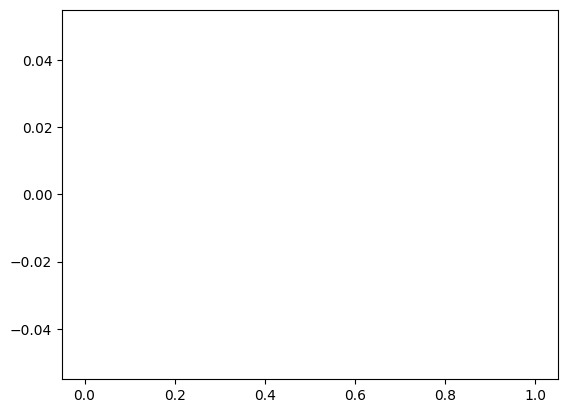

In [1509]:
for num in [2, 10, 25]:
    print('num rows with prediction > ' + str(num) + '00% underestimation price error: ' + str(len(err_df[(err_df.error_percent > (num))])))
    plt.hist(err_df[(err_df.error_percent > num)]['actual'])

In [782]:
df_n_5 = df_n_1.drop(err_df[err_df['error_percent'] < -5].index)
df_n_10 = df_n_1.drop(err_df[err_df['error_percent'] < -15].index)
df_n_25 = df_n_1.drop(err_df[err_df['error_percent'] < -25].index)

In [783]:
err_df_5, tr_er_5, te_er_5, imp_df_5 = xg_many_feats(df_n_5, {'subsample': 0.75, 'n_estimators': 200, 'min_child_weight': 8, 'max_depth': 9, 'learning_rate': 0.08, 'lambda': 2, 'colsample_bytree': 0.6, 'colsample_bynode': 0.6, 'colsample_bylevel': 0.6})

test pred mean: 18840.572
test pred min: 328.91962
test pred max: 78633.82


train pred mean: 18938.826
train pred min: -1257.1859
train pred max: 80130.516


Train MSE: 6814350.9529
Train RMSE: 2610.4312
Train R²: 0.9602
Train MAE: 1793.2419


Test MSE: 9212269.5544
Test RMSE: 3035.1721
Test R²: 0.9461
Test MAE: 2000.3224




In [784]:
err_df_10, tr_er_10, te_er_10, imp_df_10 = xg_many_feats(df_n_10, {'subsample': 0.75, 'n_estimators': 200, 'min_child_weight': 8, 'max_depth': 9, 'learning_rate': 0.08, 'lambda': 2, 'colsample_bytree': 0.6, 'colsample_bynode': 0.6, 'colsample_bylevel': 0.6})

test pred mean: 18877.38
test pred min: 527.4212
test pred max: 79191.54


train pred mean: 18893.148
train pred min: -2463.266
train pred max: 79689.586


Train MSE: 7084998.6594
Train RMSE: 2661.7661
Train R²: 0.9586
Train MAE: 1815.5124


Test MSE: 10039268.4022
Test RMSE: 3168.4805
Test R²: 0.9416
Test MAE: 2027.2506




In [785]:
err_df_25, tr_er_25, te_er_25, imp_df_25 = xg_many_feats(df_n_25, {'subsample': 0.75, 'n_estimators': 200, 'min_child_weight': 8, 'max_depth': 9, 'learning_rate': 0.08, 'lambda': 2, 'colsample_bytree': 0.6, 'colsample_bynode': 0.6, 'colsample_bylevel': 0.6})

test pred mean: 19018.566
test pred min: 179.91335
test pred max: 80571.85


train pred mean: 18856.389
train pred min: -2854.6902
train pred max: 80076.26


Train MSE: 7128343.6375
Train RMSE: 2669.8958
Train R²: 0.9582
Train MAE: 1801.4813


Test MSE: 9826877.1459
Test RMSE: 3134.7850
Test R²: 0.9436
Test MAE: 2045.8840




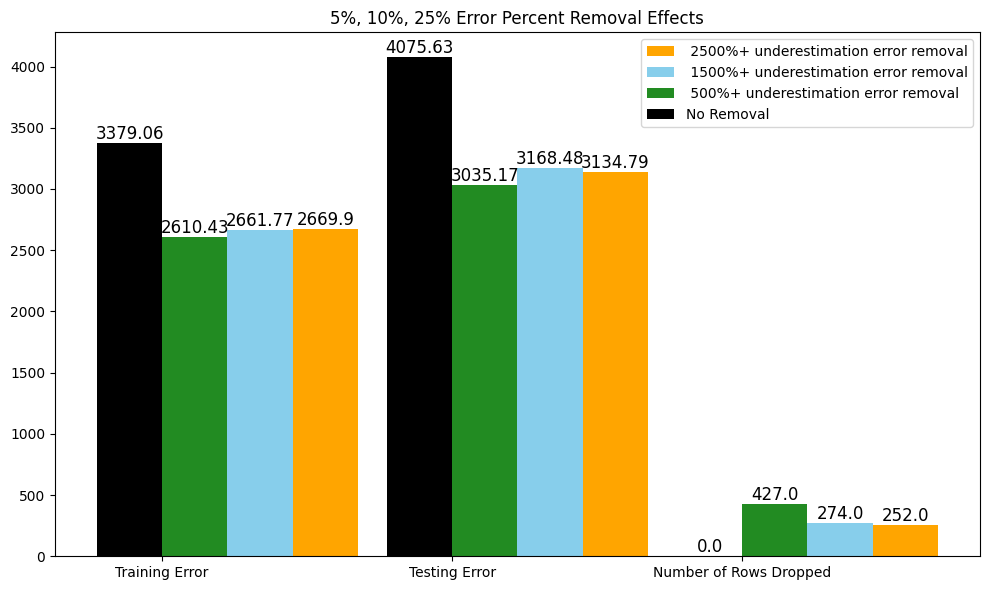

In [1513]:
# Sample data
groups = ['Training Error', 'Testing Error', 'Number of Rows Dropped']

none =  [round(x,2) for x in [tr_er, te_er, 0]]
fives = [round(x,2) for x in [tr_er_5, te_er_5, len(df_n_1) - len(df_n_5)]]  # Values for Category 1 across groups
tens = [round(x,2) for x in [tr_er_10, te_er_10, len(df_n_1) - len(df_n_10)]]
tw_fi = [round(x,2) for x in [tr_er_25, te_er_25, len(df_n_1) - len(df_n_25)]]


n_groups = len(groups)
bar_width = 0.225  # Width of the bars
index = np.arange(n_groups)  # The label locations for groups

# Plot bars
fig, ax = plt.subplots(figsize=(10, 6))

# Create side-by-side bars for each group

bar_positions = index + (4 - 1.5) * bar_width

bars25 = ax.bar(index + (4 - 1.5) * bar_width, tw_fi, bar_width, label=' 2500%+ underestimation error removal', color='orange')
bars10 = ax.bar(index + (3 - 1.5) * bar_width, tens, bar_width, label=' 1500%+ underestimation error removal', color='skyblue')
bars5 = ax.bar(index + (2 - 1.5) * bar_width, fives, bar_width, label=' 500%+ underestimation error removal', color='forestgreen')
barsn = ax.bar(index + (1 - 1.5) * bar_width, none, bar_width , label='No Removal', color='black')


# Add labels and title
ax.set_title('5%, 10%, 25% Error Percent Removal Effects')
ax.set_xticks(index)
ax.set_xticklabels(groups)

# Add legend
ax.legend(loc='upper right')

# Add text annotations
for bar in bars5:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
            ha='center', va='bottom', fontsize=12, color='black')

for bar in bars10:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
            ha='center', va='bottom', fontsize=12, color='black')

for bar in bars25:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
            ha='center', va='bottom', fontsize=12, color='black')
    
for bar in barsn:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
            ha='center', va='bottom', fontsize=12, color='black')
    
# Adjust layout to fit the plot
plt.tight_layout()

# Show plot
plt.show()

In [832]:
print('From removing ' + str(len(df_n_1) - len(df_n_5)) + ' rows (' + str(100*round((len(df_n_1) - len(df_n_5))/len(df_n_1), 4)) + '%), \n Test RMSE Decrease: $' + str(round((te_er-te_er_5),2)) + ' (' + str(100*round(((te_er-te_er_5)/te_er),2)) + '%)\n')
print('From removing ' + str(len(df_n_1) - len(df_n_10)) + ' rows (' + str(100*round((len(df_n_1) - len(df_n_10))/len(df_n_1), 4)) + '%), \n Test RMSE Decrease: $' + str(round((te_er-te_er_10),2)) + ' (' + str(100*round(((te_er-te_er_10)/te_er),2)) + '%)\n')
print('From removing ' + str(len(df_n_1) - len(df_n_25)) + ' rows (' + str(100*round((len(df_n_1) - len(df_n_25))/len(df_n_1), 4)) + '%), \n Test RMSE Decrease: $' + str(round((te_er-te_er_25),2)) + ' (' + str(100*round(((te_er-te_er_25)/te_er),2)) + '%)')

From removing 427 rows (0.49%), 
 Test RMSE Decrease: $1040.46 (26.0%)

From removing 274 rows (0.31%), 
 Test RMSE Decrease: $907.15 (22.0%)

From removing 252 rows (0.29%), 
 Test RMSE Decrease: $940.85 (23.0%)


In [ ]:
for idx in err_df_1[err_df_1.error_percent.abs() > 5].sort_values(by='error_percent', ascending=True).index:
    print('listed price: $' + str(df_new4.at[idx, 'price']))
    print('predicted price: $' + str(err_df_1.at[idx, 'predicted']))
    print('\n')
    print(df_new4.at[idx, 'description'])
    print('\n')
    print('odometer: ' + str(df_new4.at[idx, 'odometer']) + ' miles')
    print('Year: ' + str(df_new4.at[idx, 'ModelYear']))
    print('Error Percent: ' + str(err_df_1.at[idx, 'error_percent']) + '%')
    #print(df_new4.at[idx, 'state'])
    print('\n')
    print('\n')

In [883]:
df_n_25b[df_n_25b.description.str.contains("Email for questions  Car not running but I can get it jumped for you  Willing to discuss the price")].index

Index([9622], dtype='int64')

In [884]:
df_n_25b[df_n_25b.description.str.contains("2011 Chevrolet Silverado 1500 LS available FOR SALE!!  4x4 w/ 91k MILES! Total price $15,600.00")].index

Index([], dtype='int64')

In [ ]:
new_drops = [9622]

In [ ]:
for idx in err_df_25[(err_df_25.errors > 10000) & (err_df_25.error_percent > 0.5)].sort_values(by='error_percent', ascending=True).index:
    print(str(idx))
    print('listed price: $' + str(df_n_25.at[idx, 'price']))
    print('predicted price: $' + str(err_df_25.at[idx, 'predicted']))
    print('\n')
    print(df_n_25.at[idx, 'description'])
    print('\n')
    print('odometer: ' + str(df_n_25.at[idx, 'odometer']) + ' miles')
    print('Year: ' + str(df_n_25.at[idx, 'ModelYear']))
    print('Error Percent: ' + str(err_df_25.at[idx, 'error_percent']) + '%')
    print('\n')
    print('\n')

In [866]:
to_drop = [46890, 74787, 55169, 54150, 79676, 74787, 75114]

In [881]:
df_n_25b = df_n_25.drop(to_drop)

In [ ]:
err_df_25b, tr_er_25b, te_er_25b, imp_df_25b = xg_many_feats(df_n_25b, {'subsample': 0.75, 'n_estimators': 200, 'min_child_weight': 8, 'max_depth': 9, 'learning_rate': 0.08, 'lambda': 2, 'colsample_bytree': 0.6, 'colsample_bynode': 0.6, 'colsample_bylevel': 0.6})

In [ ]:
for idx in err_df_25b[err_df_25b.error_percent < -25].sort_values(by='error_percent', ascending=True).index:
    print('listed price: $' + str(df_n_25b.at[idx, 'price']))
    print('predicted price: $' + str(err_df_25b.at[idx, 'predicted']))
    print('\n')
    print(df_n_25b.at[idx, 'description'])
    print('\n')
    print('odometer: ' + str(df_n_25b.at[idx, 'odometer']) + ' miles')
    print('Year: ' + str(df_n_25b.at[idx, 'ModelYear']))
    print('Error Percent: ' + str(err_df_25b.at[idx, 'error_percent']) + '%')
    #print(df_new4.at[idx, 'state'])
    print('\n')
    print('\n')

In [890]:
err_df_25b[err_df_25b.error_percent < -25].index

Index([72136, 72063, 72151, 72005, 71987, 71836, 72247, 72221, 72068, 72040,
       71885, 70043, 71946, 71884, 72233, 68926, 72234, 72184, 71901, 72182,
       72014, 72245],
      dtype='int64')

Text(0, 0.5, 'predicted $ price')

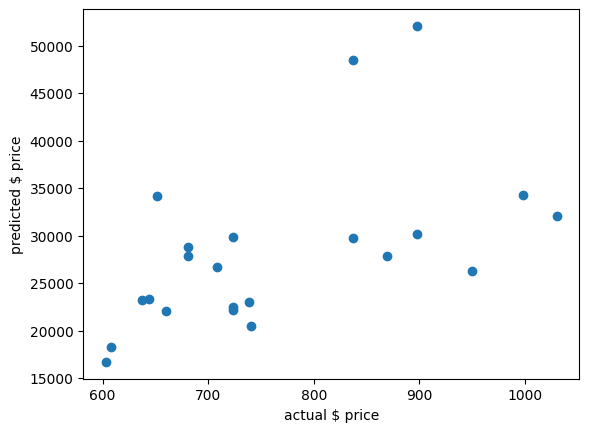

In [895]:
plt.scatter(err_df_25b[err_df_25b.error_percent < -25]['actual'], err_df_25b[err_df_25b.error_percent < -25]['predicted'])
plt.xlabel('actual $ price')
plt.ylabel('predicted $ price')

In [891]:
df_new1 =  df_n_25b.drop(err_df_25b[err_df_25b.error_percent < -25].index)

In [896]:
err_final, tr_final, te_final, imp_df_final = xg_many_feats(df_new1, {'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 12, 'learning_rate': 0.16, 'lambda': 1, 'colsample_bytree': 0.7, 'colsample_bynode': 0.7, 'colsample_bylevel': 0.8})

test pred mean: 18870.412
test pred min: -92.27284
test pred max: 79569.945


train pred mean: 18896.994
train pred min: -1722.1512
train pred max: 80573.984


Train MSE: 3259049.5069
Train RMSE: 1805.2838
Train R²: 0.9809
Train MAE: 1262.9970


Test MSE: 8640545.4304
Test RMSE: 2939.4805
Test R²: 0.9502
Test MAE: 1880.7982




In [ ]:
err_final1, tr_final1, te_final1, imp_df_final1 = xg_many_feats(df_new1, {'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 14, 'learning_rate': 0.1, 'lambda': 3, 'colsample_bytree': 0.8, 'colsample_bynode': 0.7, 'colsample_bylevel': 0.6})

In [ ]:
err_final2, tr_final2, te_final2, imp_df_final2 = xg_many_feats(df_new1, {'subsample': 0.9, 'n_estimators': 225, 'min_child_weight': 5, 'max_depth': 11, 'learning_rate': 0.08, 'lambda': 3, 'colsample_bytree': 0.9, 'colsample_bynode': 0.7, 'colsample_bylevel': 0.7})

In [ ]:
for idx in err_final2[err_final2.error_percent < -5].sort_values(by='error_percent', ascending=True).index:
    print(str(idx))
    print('listed price: $' + str(df_new1.at[idx, 'price']))
    print('predicted price: $' + str(err_final2.at[idx, 'predicted']))
    print('\n')
    print(df_new1.at[idx, 'description'])
    print('\n')
    print('odometer: ' + str(df_new1.at[idx, 'odometer']) + ' miles')
    print('Year: ' + str(df_new1.at[idx, 'ModelYear']))
    print('Error Percent: ' + str(err_final2.at[idx, 'error_percent']) + '%')
    #print(df_new4.at[idx, 'state'])
    print('\n')
    print('\n')

Text(0.5, 1.0, 'Greater than 100% Errors')

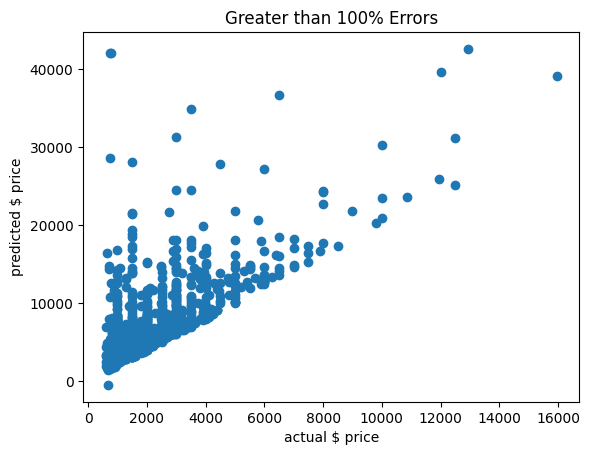

In [922]:
plt.scatter(err_final2[err_final2.error_percent.abs() > 1]['actual'], err_final2[err_final2.error_percent.abs() > 1]['predicted'])
plt.xlabel('actual $ price')
plt.ylabel('predicted $ price')
plt.title('Greater than 100% Errors')

In [915]:
len(err_final2[err_final2.error_percent > 0.5])

63

In [923]:
len(err_final2[err_final2.error_percent.abs() > 1])

877

In [926]:
df_new2 = df_new1.drop(err_final2[err_final2.error_percent.abs() > 5].index)

In [941]:
dummies = good_categoricals + additional_cats + useful_cl
numbers = good_number_info

['ABS', 'AdaptiveCruiseControl', 'AdaptiveDrivingBeam', 'AirBagLocCurtain', 'AirBagLocFront', 'AirBagLocKnee', 'AirBagLocSeatCushion', 'AirBagLocSide', 'AutoReverseSystem', 'BedType', 'BlindSpotMon', 'BodyCabType', 'BodyClass', 'BrakeSystemType', 'CAN_AACN', 'CIB', 'DaytimeRunningLight', 'Doors', 'DriveType', 'DynamicBrakeSupport', 'ESC', 'ElectrificationLevel', 'EngineConfiguration', 'EngineCylinders', 'ForwardCollisionWarning', 'FuelInjectionType', 'FuelTypePrimary', 'GVWR', 'KeylessIgnition', 'LaneDepartureWarning', 'LaneKeepSystem', 'LowerBeamHeadlampLightSource', 'Make', 'ParkAssist', 'PedestrianAutomaticEmergencyBraking', 'Pretensioner', 'RearCrossTrafficAlert', 'RearVisibilitySystem', 'SeatBeltsAll', 'SeatRows', 'Seats', 'SemiautomaticHeadlampBeamSwitching', 'SteeringLocation', 'TPMS', 'TractionControl', 'TransmissionSpeeds', 'TransmissionStyle', 'Turbo', 'ValveTrainDesign', 'VehicleType', 'WheelBaseType', 'Windows', 'condition', 'paint_color', 'Wheels', 'Model', 'Trim', 'Series

In [960]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

def xg_random_search(df):
        
    cats = good_categoricals# + ['Trim', 'Series', 'Trim2', 'Series2']
    nums = good_number_info

    df_c = pd.get_dummies(df[cats].astype(str))
    df_new = pd.concat([df_c, df[nums]], axis=1)
    X = df_new.drop(['price'], axis=1)
    y = df_new['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)  

    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    # Define the parameter grid
    param_grid = {
        'n_estimators': [175, 200, 225],  
        'max_depth': [10,11,12, 13],         
        'learning_rate': [0.05, 0.06, 0.8, 0.07, 0.09, 0.1],  
        'colsample_bytree': [0.8, 0.6, 0.7],    
        'subsample': [0.7, 0.8, 0.6],
        'min_child_weight': [7, 9, 11, 15, 13],
        'lambda': [1.5, 2.5, 2, 3, 3.5, 4, 4.5, 5],
        'colsample_bynode': [0.6, 0.8, 0.4], 
        'colsample_bylevel': [0.6, 0.8, 0.4]
    }
    # Initialize GridSearchCV
    grid_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_grid,
        n_iter=50,
        scoring='neg_root_mean_squared_error',
        cv=5,               # Number of cross-validation folds
        n_jobs=-1,          # Use all available cores
        verbose=2,          # Verbosity level
        return_train_score=True
    )
    
    # Fit GridSearchCV on the training data
    grid_search.fit(X_train, y_train)
    
    # Best parameters and score from GridSearchCV
    print("Best parameters found: ", grid_search.best_params_)
    print("Best RMSE score on training data: ", -grid_search.best_score_)
    
    # Predict on test data using the best estimator
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    results = pd.DataFrame(grid_search.cv_results_)

    # Save to CSV
    results.to_csv('rand_search_results_1_5.csv', index=False)    
    
    # Evaluate on test data
    test_rmse = get_rmse(y_test, y_pred)
    print("Test RMSE: ", test_rmse)    

In [959]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

def xg_random_search_2(df):
        
    cats = good_categoricals# + ['Trim', 'Series', 'Trim2', 'Series2']
    nums = good_number_info

    df_c = pd.get_dummies(df[cats].astype(str))
    df_new = pd.concat([df_c, df[nums]], axis=1)
    X = df_new.drop(['price'], axis=1)
    y = df_new['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)  

    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    # Define the parameter grid
    param_grid = {
        'n_estimators': [175, 200, 225],  
        'max_depth': [10,11,12, 13],         
        'learning_rate': [0.05, 0.06, 0.8, 0.07, 0.09, 0.1],  
        'colsample_bytree': [0.8, 0.6, 0.7],    
        'subsample': [0.7, 0.8, 0.6],
        'min_child_weight': [7, 9, 11, 15, 13],
        'lambda': [1.5, 2.5, 2, 3, 3.5, 4, 4.5, 5],
        'colsample_bynode': [0.6, 0.8, 0.4], 
        'colsample_bylevel': [0.6, 0.8, 0.4]
    }
    # Initialize GridSearchCV
    grid_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_grid,
        n_iter=50,
        scoring='neg_root_mean_squared_error',
        cv=5,               # Number of cross-validation folds
        n_jobs=-1,          # Use all available cores
        verbose=2,          # Verbosity level
        return_train_score=True
    )
    
    # Fit GridSearchCV on the training data
    grid_search.fit(X_train, y_train)
    
    # Best parameters and score from GridSearchCV
    print("Best parameters found: ", grid_search.best_params_)
    print("Best RMSE score on training data: ", -grid_search.best_score_)
    
    # Predict on test data using the best estimator
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    results = pd.DataFrame(grid_search.cv_results_)

    # Save to CSV
    results.to_csv('rand_search_results_2_5.csv', index=False)    
    
    # Evaluate on test data
    test_rmse = get_rmse(y_test, y_pred)
    print("Test RMSE: ", test_rmse)    

In [955]:
xg_random_search(df_new2)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 225, 'min_child_weight': 7, 'max_depth': 12, 'learning_rate': 0.07, 'lambda': 4, 'colsample_bytree': 0.7, 'colsample_bynode': 0.8, 'colsample_bylevel': 0.4}
Best RMSE score on training data:  3016.3830683459905
Test RMSE:  2932.8136843404577


In [954]:
xg_random_search_2(df_new2)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 225, 'min_child_weight': 9, 'max_depth': 13, 'learning_rate': 0.06, 'lambda': 4.5, 'colsample_bytree': 0.8, 'colsample_bynode': 0.6, 'colsample_bylevel': 0.6}
Best RMSE score on training data:  3014.784199541916
Test RMSE:  2936.5586217357436


In [961]:
xg_random_search(df_new2)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 7, 'max_depth': 12, 'learning_rate': 0.07, 'lambda': 2, 'colsample_bytree': 0.8, 'colsample_bynode': 0.8, 'colsample_bylevel': 0.8}
Best RMSE score on training data:  2978.9130652285994
Test RMSE:  2944.322010461214


In [962]:
xg_random_search_2(df_new2)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 225, 'min_child_weight': 7, 'max_depth': 13, 'learning_rate': 0.07, 'lambda': 3.5, 'colsample_bytree': 0.7, 'colsample_bynode': 0.8, 'colsample_bylevel': 0.6}
Best RMSE score on training data:  2962.1268215320765
Test RMSE:  2920.8642447528323


In [967]:
rs_15 = pd.read_csv('rand_search_results_1_5.csv')
rs_25 = pd.read_csv('rand_search_results_2_5.csv')
rs_1 = pd.read_csv('rand_search_results_1.csv')
rs_2 = pd.read_csv('rand_search_results_2.csv')

In [1004]:
all_res = pd.concat([rs_15 , rs_25 , rs_1 , rs_2], axis=0).reset_index()

In [1006]:
param_cols = [x for x in all_res.columns if 'param_' in x]

In [1033]:
all_res['score_ratio'] = 100*(all_res['mean_train_score']/all_res['mean_test_score'])

In [1357]:
all_res[all_res['score_ratio'] > 80][['score_ratio', 'rank_test_score', 'mean_train_score', 'mean_test_score'] + param_cols].sort_values(by='mean_test_score', ascending=False).head(5)

,score_ratio,rank_test_score,mean_train_score,mean_test_score,param_subsample,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_lambda,param_colsample_bytree,param_colsample_bynode,param_colsample_bylevel
53,81.669693,22,-2461.875213,-3014.429385,0.7,225,11,10,0.07,3.5,0.6,0.6,0.8
19,80.268026,21,-2425.722832,-3022.028766,0.8,200,15,11,0.09,3.0,0.7,0.6,0.4
18,80.019127,23,-2421.215452,-3025.795869,0.7,225,11,10,0.10,2.5,0.7,0.6,0.4
68,80.398654,29,-2436.402262,-3030.401797,0.6,200,13,12,0.06,5.0,0.7,0.8,0.6
3,80.297764,24,-2436.574830,-3034.424249,0.7,225,13,12,0.06,2.0,0.6,0.4,0.6


In [1039]:
all_res.loc[53, param_cols]

param_subsample             0.7
param_n_estimators          225
param_min_child_weight       11
param_max_depth              10
param_learning_rate        0.07
param_lambda                3.5
param_colsample_bytree      0.6
param_colsample_bynode      0.6
param_colsample_bylevel     0.8
Name: 53, dtype: object

In [1041]:
parameters1 = {'subsample': 0.7, 'n_estimators': 225, 'min_child_weight': 11, 'max_depth': 10, 'learning_rate': 0.07, 'lambda': 3.5, 'colsample_bytree': 0.6, 'colsample_bynode': 0.6, 'colsample_bylevel': 0.8}

In [1042]:
all_res.loc[19, param_cols]

param_subsample             0.8
param_n_estimators          200
param_min_child_weight       15
param_max_depth              11
param_learning_rate        0.09
param_lambda                3.0
param_colsample_bytree      0.7
param_colsample_bynode      0.6
param_colsample_bylevel     0.4
Name: 19, dtype: object

In [1043]:
parameters2 = {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 15, 'max_depth': 11, 'learning_rate': 0.09, 'lambda': 3.0, 'colsample_bytree': 0.7, 'colsample_bynode': 0.6, 'colsample_bylevel': 0.4}

In [1310]:
dfls = [ err1_df5_p1,err1_df25_p1, err1_3a_75_p1, err1_4_75_p1, err1_5_75_p1, err1_6_75_p1, err1_7_75_p1, err1_8_75_p1, err1_9_75_p1]

In [1313]:
tr_ls = [tr1_df5_p1, tr1_25_p1,  tr1_3a_75_p1, tr1_4_75_p1, tr1_5_75_p1, tr1_6_75_p1, tr1_7_75_p1, tr1_8_75_p1, tr1_9_75_p1]

In [1314]:
te_ls = [ te1_df5_p1, te1_25_p1, te1_3a_75_p1, te1_4_75_p1, te1_5_75_p1, te1_6_75_p1, te1_76_75_p1, te1_8_75_p1, te1_9_75_p1]

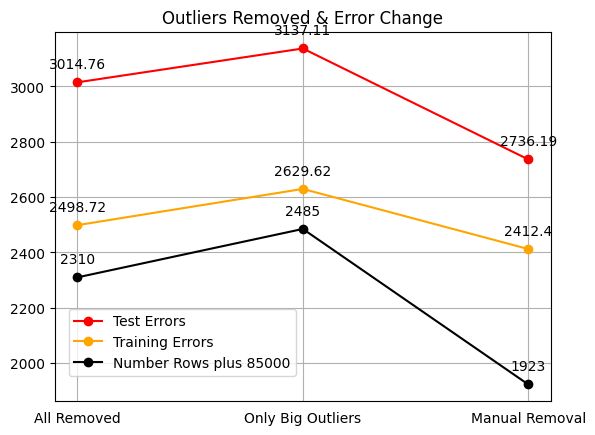

In [1468]:
# Create the line graph

x= range(len(tr_ls[:3]))

plt.plot(
    x, te_ls[:3], marker='o', linestyle='-', color='red', label='Test Errors')

plt.plot(
    x, tr_ls[:3], marker='o', linestyle='-', color='orange', label='Training Errors')

data=[len(x)-85000 for x in dfls[:3]]

plt.plot(
    x, data, marker='o', linestyle='-', color='black', label='Number Rows plus 85000')

# Add labels and title
#plt.xlabel('Outlier Removal')
#plt.ylabel('Num Rows')
plt.title('Outliers Removed & Error Change')

for i, value in enumerate(data):
    plt.annotate(f'{value}', 
                 (x[i], data[i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center',
                 fontsize=10,  # Font size of the annotation
                 color='black')  # Color of the annotation text
    
for d_d in [[round(x,2) for x in tr_ls[:3]],[round(x,2) for x in  te_ls[:3]]]:
    # Annotate points with custom style
    for i, value in enumerate(d_d):
        plt.annotate(f'{value}', 
                     (x[i], d_d[i]), 
                     textcoords="offset points", 
                     xytext=(0,10), 
                     ha='center',
                     fontsize=10,  # Font size of the annotation
                     color='black')  # Color of the annotation text

x_labels = ['All Removed', 'Only Big Outliers', 'Manual Removal']

plt.xticks(ticks=x, labels=x_labels, rotation=0)  # Set custom labels with rotation
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True, labeltop=False)  # Hide ticks

# Show the graph
plt.grid(True)
plt.legend(loc='lower right', bbox_to_anchor=(0.5, 0.05)) 
plt.show()

In [1353]:
print('From removing ' + str(len(err1_df25_p1) - len(err1_df5_p1)) + ' rows (' + str(100*round((len(err1_df25_p1) - len(err1_df5_p1))/len(err1_df25_p1), 4)) + '%), \n Test RMSE Decrease: $' + str(round((te1_25_p1-te_er_5),2)) + ' (' + str(100*round(((te1_25_p1-te1_df5_p1)/te1_df5_p1),4)) + '%)\n')
print('From removing ' + str(len(err1_df25_p1) - len(err1_3a_75_p1)) + ' rows (' + str(100*round((len(err1_df25_p1) - len(err1_3a_75_p1))/len(err1_3a_75_p1), 4)) + '%), \n Test RMSE Decrease: $' + str(round((te1_25_p1-te1_3a_75_p1),2)) + ' (' + str(100*round(((te1_25_p1-te1_3a_75_p1)/te1_25_p1),4)) + '%)\n')


From removing 175 rows (0.2%), 
 Test RMSE Decrease: $101.93 (4.06%)

From removing 562 rows (0.65%), 
 Test RMSE Decrease: $400.92 (12.78%)



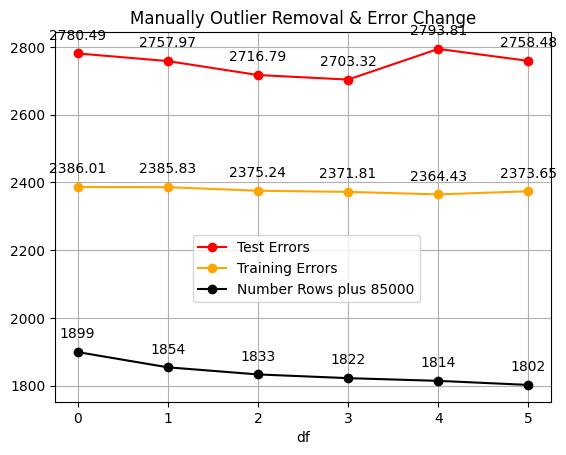

In [1319]:
# Create the line graph

x= range(len(tr_ls[3:]))

plt.plot(
    x, te_ls[3:], marker='o', linestyle='-', color='red', label='Test Errors')

plt.plot(
    x, tr_ls[3:], marker='o', linestyle='-', color='orange', label='Training Errors')

data=[len(x)-85000 for x in dfls[3:]]

plt.plot(
    x, data, marker='o', linestyle='-', color='black', label='Number Rows plus 85000')

# Add labels and title
plt.xlabel('df')
#plt.ylabel('Num Rows')
plt.title('Manually Outlier Removal & Error Change')

for i, value in enumerate(data):
    plt.annotate(f'{value}', 
                 (x[i], data[i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center',
                 fontsize=10,  # Font size of the annotation
                 color='black')  # Color of the annotation text
    
for d_d in [[round(x,2) for x in tr_ls[3:]],[round(x,2) for x in  te_ls[3:]]]:
    # Annotate points with custom style
    for i, value in enumerate(d_d):
        plt.annotate(f'{value}', 
                     (x[i], d_d[i]), 
                     textcoords="offset points", 
                     xytext=(0,10), 
                     ha='center',
                     fontsize=10,  # Font size of the annotation
                     color='black')  # Color of the annotation text
# Show the graph
plt.grid(True)
plt.legend(loc='lower right', bbox_to_anchor=(0.75, 0.25)) 
plt.show()

In [1360]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

def xg_random_search(df):
        
    cats = good_categoricals# + ['Trim', 'Series', 'Trim2', 'Series2']
    nums = good_number_info

    df_c = pd.get_dummies(df[cats].astype(str))
    df_new = pd.concat([df_c, df[nums]], axis=1)
    X = df_new.drop(['price'], axis=1)
    y = df_new['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 11)  

    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=11)

    # Define the parameter grid
    param_grid = {
        'n_estimators': np.arange(150, 226, 5),  
        'max_depth': np.arange(9, 15, 1),         
        'learning_rate': np.arange(0.05, 0.121, 0.01),  
        'colsample_bytree': np.arange(0.5, 1.05, 0.05),    
        'subsample': np.arange(0.4, 1.05, 0.05),
        'min_child_weight': np.arange(4, 21, 2),
        'lambda': np.arange(2, 9.5, 0.5),
        'colsample_bynode': np.arange(0.5, 1.05, 0.05), 
        'colsample_bylevel': np.arange(0.5, 1.05, 0.05)
    }
    # Initialize GridSearchCV
    grid_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_grid,
        n_iter=50,
        scoring='neg_root_mean_squared_error',
        cv=3,               # Number of cross-validation folds
        n_jobs=-1,          # Use all available cores
        verbose=2,          # Verbosity level
        return_train_score=True
    )
    
    # Fit GridSearchCV on the training data
    grid_search.fit(X_train, y_train)
    
    # Best parameters and score from GridSearchCV
    print("Best parameters found: ", grid_search.best_params_)
    print("Best RMSE score on training data: ", -grid_search.best_score_)
    
    # Predict on test data using the best estimator
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    results = pd.DataFrame(grid_search.cv_results_)

    # Save to CSV
    results.to_csv('rand_search_results_5_2.csv', index=False)    
    
    # Evaluate on test data
    test_rmse = get_rmse(y_test, y_pred)
    print("Test RMSE: ", test_rmse)    

In [1378]:
res_5_1 = pd.read_csv('rand_search_results_5_1.csv')
res_5_2 = pd.read_csv('rand_search_results_5_2.csv')
res_7_1 = pd.read_csv('rand_search_results_7_1.csv')
res_7_2 = pd.read_csv('rand_search_results_7_2.csv')
res_9_1 = pd.read_csv('rand_search_results_9_1.csv')
res_9_2 = pd.read_csv('rand_search_results_9_2.csv')

In [1379]:
all_res_2 = pd.concat([res_5_1, res_5_2, res_7_1, res_7_2, res_9_1, res_9_2], axis=0).reset_index()

In [1380]:
param_cols = [x for x in all_res.columns if 'param_' in x]

In [1383]:
all_res_2['score_ratio'] = 100*(all_res_2['mean_train_score']/all_res_2['mean_test_score'])

In [1429]:
all_res_2[all_res_2['score_ratio'] > 87][['score_ratio', 'rank_test_score', 'mean_train_score', 'mean_test_score'] + param_cols].sort_values(by=['rank_test_score','score_ratio'])#, ascending=False)

,score_ratio,rank_test_score,mean_train_score,mean_test_score,param_subsample,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_lambda,param_colsample_bytree,param_colsample_bynode,param_colsample_bylevel
14,87.001185,47,-2616.078522,-3006.945860,0.60,215,20,9,0.06,4.0,0.50,0.90,0.90
252,87.207140,48,-2608.038871,-2990.625387,0.65,175,20,10,0.07,7.5,0.50,0.60,0.75
91,87.315179,49,-2670.031976,-3057.924190,0.45,160,8,9,0.05,2.5,0.70,0.85,0.65
36,87.839475,49,-2672.112374,-3042.040473,0.45,180,14,9,0.08,5.0,0.70,0.55,0.65
232,88.072538,49,-2652.192369,-3011.372706,0.65,215,16,9,0.06,2.5,0.50,0.55,0.55
172,88.236194,49,-2705.183493,-3065.843358,0.40,180,18,10,0.10,6.5,0.55,0.50,0.55
270,88.190857,50,-2704.862591,-3067.055565,0.40,150,6,9,0.06,6.5,0.95,0.80,0.55
137,88.880773,50,-2749.565172,-3093.543253,0.65,155,12,9,0.06,7.0,0.65,0.65,0.55
70,89.349768,50,-2754.515508,-3082.845718,0.40,170,16,9,0.07,6.0,0.85,0.65,0.60
150,90.475543,50,-2830.148219,-3128.080929,0.40,170,18,9,0.06,7.5,0.90,0.65,0.70


In [1403]:
all_res_2.loc[252, param_cols]

param_subsample            0.65
param_n_estimators          175
param_min_child_weight       20
param_max_depth              10
param_learning_rate        0.07
param_lambda                7.5
param_colsample_bytree      0.5
param_colsample_bynode      0.6
param_colsample_bylevel    0.75
Name: 252, dtype: object

In [1404]:
p1 = {'subsample': 0.65, 'n_estimators': 175, 'min_child_weight': 20, 'max_depth': 10, 'learning_rate': 0.07, 'lambda': 7.5, 'colsample_bytree': 0.5, 'colsample_bynode': 0.6, 'colsample_bylevel': 0.75}

In [1434]:
all_res_2[all_res_2['score_ratio'] > 75][['score_ratio', 'rank_test_score', 'mean_train_score', 'mean_test_score'] + param_cols].sort_values(by=['rank_test_score','score_ratio'])#, ascending=False)

,score_ratio,rank_test_score,mean_train_score,mean_test_score,param_subsample,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_lambda,param_colsample_bytree,param_colsample_bynode,param_colsample_bylevel
218,76.047562,8,-2181.737609,-2868.911980,0.75,200,10,10,0.08,3.0,0.65,0.95,0.60
226,75.274368,9,-2159.752695,-2869.174124,0.75,195,16,14,0.06,7.0,0.50,0.70,0.75
247,75.131704,10,-2160.303285,-2875.355096,0.85,195,14,11,0.10,6.5,0.60,0.65,0.65
64,75.904694,11,-2197.674389,-2895.307619,1.00,185,6,10,0.09,9.0,0.70,0.85,0.80
24,77.571150,12,-2246.893605,-2896.558327,1.00,210,20,11,0.09,7.0,0.60,0.55,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,85.842654,50,-2587.447241,-3014.174329,0.45,170,16,12,0.05,8.0,1.00,0.55,0.70
270,88.190857,50,-2704.862591,-3067.055565,0.40,150,6,9,0.06,6.5,0.95,0.80,0.55
137,88.880773,50,-2749.565172,-3093.543253,0.65,155,12,9,0.06,7.0,0.65,0.65,0.55
70,89.349768,50,-2754.515508,-3082.845718,0.40,170,16,9,0.07,6.0,0.85,0.65,0.60


In [1408]:
all_res_2.loc[218, param_cols]

param_subsample            0.75
param_n_estimators          200
param_min_child_weight       10
param_max_depth              10
param_learning_rate        0.08
param_lambda                3.0
param_colsample_bytree     0.65
param_colsample_bynode     0.95
param_colsample_bylevel     0.6
Name: 218, dtype: object

In [1409]:
p2 = {'subsample': 0.75, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 10, 'learning_rate': 0.08, 'lambda': 3.0, 'colsample_bytree': 0.65, 'colsample_bynode': 0.95, 'colsample_bylevel': 0.6}

In [1411]:
all_res_2[all_res_2['score_ratio'] > 78][['score_ratio', 'rank_test_score', 'mean_train_score', 'mean_test_score'] + param_cols].sort_values(by='rank_test_score')#, ascending=False)

,score_ratio,rank_test_score,mean_train_score,mean_test_score,param_subsample,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_lambda,param_colsample_bytree,param_colsample_bynode,param_colsample_bylevel
249,80.710219,14,-2321.587967,-2876.448595,0.80,225,16,9,0.10,9.0,0.55,1.00,1.00
75,78.181693,16,-2277.092499,-2912.564844,0.80,200,8,11,0.06,8.5,0.65,0.65,0.70
28,78.717372,17,-2294.536357,-2914.904676,0.75,180,16,11,0.08,8.5,0.60,0.90,0.90
104,78.068772,19,-2274.664509,-2913.667577,1.00,210,14,9,0.12,8.0,0.80,0.90,0.70
37,78.386266,21,-2285.991435,-2916.316284,1.00,185,18,10,0.11,6.5,0.65,0.60,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,89.349768,50,-2754.515508,-3082.845718,0.40,170,16,9,0.07,6.0,0.85,0.65,0.60
213,85.842654,50,-2587.447241,-3014.174329,0.45,170,16,12,0.05,8.0,1.00,0.55,0.70
3,85.767248,50,-2611.722241,-3045.127707,0.75,160,4,9,0.05,6.0,0.60,0.55,0.95
150,90.475543,50,-2830.148219,-3128.080929,0.40,170,18,9,0.06,7.5,0.90,0.65,0.70


Text(0, 0.5, 'mean train score')

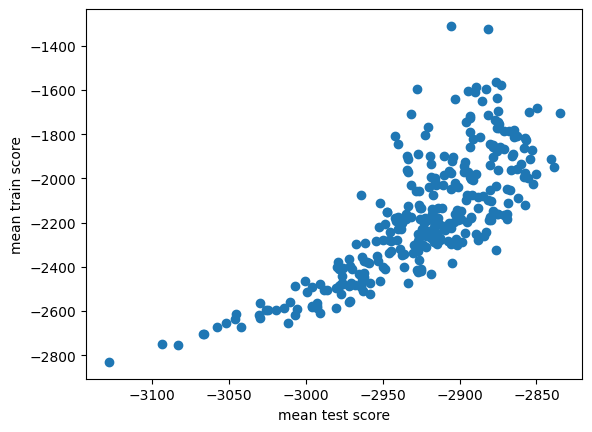

In [1423]:
plt.scatter(all_res_2['mean_test_score'], all_res_2['mean_train_score'])
plt.xlabel('mean test score')
plt.ylabel('mean train score')

In [1439]:
all_res_2.score_ratio.max()

90.47554340538348

In [1436]:
all_res_2[all_res_2.score_ratio == all_res_2.score_ratio.max()].index

Index([150], dtype='int64')

In [1438]:
all_res_2.loc[150, ['score_ratio', 'rank_test_score', 'mean_train_score', 'mean_test_score'] + param_cols]#.sort_values(by='score_ratio')

score_ratio                  90.475543
rank_test_score                     50
mean_train_score          -2830.148219
mean_test_score           -3128.080929
param_subsample                    0.4
param_n_estimators                 170
param_min_child_weight              18
param_max_depth                      9
param_learning_rate               0.06
param_lambda                       7.5
param_colsample_bytree             0.9
param_colsample_bynode            0.65
param_colsample_bylevel            0.7
Name: 150, dtype: object

In [1440]:
p3 = {'subsample': 0.4, 'n_estimators': 170, 'min_child_weight': 18, 'max_depth': 9, 'learning_rate': 0.06, 'lambda': 7.5, 'colsample_bytree': 0.9, 'colsample_bynode': 0.65, 'colsample_bylevel': 0.7}

In [ ]:
err_5_24_p1, tr_5_24_p1, te_5_24_p1, imp_5_24_p1 = xg_many_feats_rs(df_new5, 24, p1)

In [ ]:
err_5_24_p2, tr_5_24_p2, te_5_24_p2, imp_5_24_p2 = xg_many_feats_rs(df_new5, 24, p2)

In [ ]:
err_5_24_p3, tr_5_24_p3, te_5_24_p3, imp_5_24_p3 = xg_many_feats_rs(df_new5, 24, p3)

In [ ]:
err_7_24_p1, tr_7_24_p1, te_7_24_p1, imp_7_24_p1 = xg_many_feats_rs(df_new7, 24, p1)

In [ ]:
err_7_24_p2, tr_7_24_p2, te_7_24_p2, imp_7_24_p2 = xg_many_feats_rs(df_new7, 24, p2)

In [ ]:
err_7_24_p3, tr_7_24_p3, te_7_24_p3, imp_7_24_p3 = xg_many_feats_rs(df_new7, 24, p3)

In [ ]:
err_9_24_p1, tr_9_24_p1, te_9_24_p1, imp_9_24_p1 = xg_many_feats_rs(df_new9, 24, p1)

In [ ]:
err_9_24_p2, tr_9_24_p2, te_9_24_p2, imp_9_24_p2 = xg_many_feats_rs(df_new9, 24, p2)

In [ ]:
err_9_24_p3, tr_9_24_p3, te_9_24_p3, imp_9_24_p3 = xg_many_feats_rs(df_new9, 24, p3)

In [1484]:
tr_p1 = [tr_5_24_p1, tr_7_24_p1, tr_9_24_p1]
te_p1 = [te_5_24_p1, te_7_24_p1, te_9_24_p1]

tr_p2 = [tr_5_24_p2, tr_7_24_p2, tr_9_24_p2]
te_p2 = [te_5_24_p2, te_7_24_p2, te_9_24_p2]

tr_p3 = [tr_5_24_p3, tr_7_24_p3, tr_9_24_p3]
te_p3 = [te_5_24_p3, te_7_24_p3, te_9_24_p3]

tr_err = [tr_p1, tr_p2, tr_p3]
te_err = [te_p1, te_p2, te_p3]

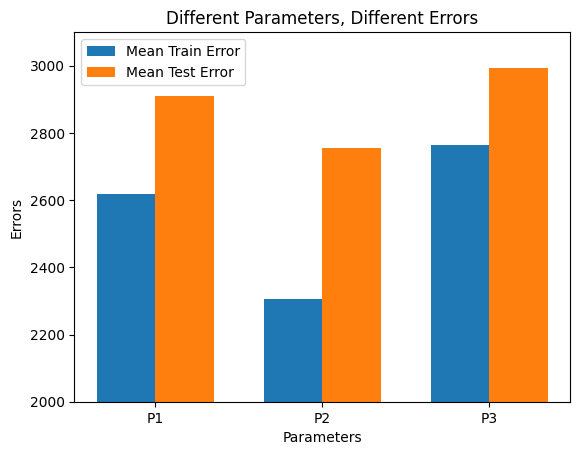

In [1514]:
# Example data
groups = ['P1', 'P2', 'P3']
train_err = [np.mean(d) for d in tr_err]  # Values for the first set of bars
test_err = [np.mean(d) for d in te_err]  # Values for the second set of bars

# Number of groups and bars per group
num_groups = len(groups)
bar_width = 0.35  # Width of each bar

# Create a figure and axis
fig, ax = plt.subplots()

# X values (positions of groups)
x = np.arange(num_groups)

# Plot bars
bars1_positions = x - bar_width / 2
bars2_positions = x + bar_width / 2

ax.bar(bars1_positions, train_err, width=bar_width, label='Mean Train Error')
ax.bar(bars2_positions, test_err, width=bar_width, label='Mean Test Error')

# Add labels, title, and legend
ax.set_xlabel('Parameters')
ax.set_ylabel('Errors')
ax.set_title('Different Parameters, Different Errors')
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.legend(loc='best')
ax.set_ylim(2000,3100)
# Display the plot
plt.show()



In [690]:
# WITH Model, EngineConfiguration, state, state_income features

def grid_search_xg(df):
        
    cats = ['Turbo', 'FuelTypePrimary', 'VehicleType', 'EngineCylinders', 'BodyClass', 'DriveType','GVWR', 'Doors', 'paint_color',
           'state', 'EngineConfiguration', 'Model']
    numbers = ['odometer', 'ModelYear', 'displ', 'state_income']
    pred = ['price']

    df_c = pd.get_dummies(df[cats].astype(str))
    df_new = pd.concat([df_c, df[['odometer', 'ModelYear', 'displ','price', 'state_income']]], axis=1)
    X = df_new.drop(['price'], axis=1)
    y = df_new['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)  

    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    # Define the parameter grid
    param_grid = {
        'n_estimators': [150, 200, 250],  # Number of boosting rounds
        'max_depth': [7,8,9],          # Maximum depth of the trees
        'learning_rate': [0.1, 0.09, 0.08],  # Step size shrinkage 
        'colsample_bytree': [0.8, 0.6], # Fraction of features used for each tree       
        'subsample': [1.0, 0.8],
        'min_child_weight': [3, 5, 7]
    }
    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        scoring='neg_root_mean_squared_error',
        cv=5,               # Number of cross-validation folds
        n_jobs=-1,          # Use all available cores
        verbose=2,          # Verbosity level
        return_train_score=False
    )
    
    # Fit GridSearchCV on the training data
    grid_search.fit(X_train, y_train)
    
    # Best parameters and score from GridSearchCV
    print("Best parameters found: ", grid_search.best_params_)
    print("Best RMSE score on training data: ", -grid_search.best_score_)
    
    # Predict on test data using the best estimator
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    results = pd.DataFrame(grid_search.cv_results_)

    # Save to CSV
    results.to_csv('grid_search_results_full.csv', index=False)    
    
    # Evaluate on test data
    test_rmse = get_rmse(y_test, y_pred)
    print("Test RMSE: ", test_rmse)

In [691]:
# WITHOUT Model, EngineConfiguration, state, state_income features

def grid_search_xg_b(df):
        
    cats = ['Turbo', 'FuelTypePrimary', 'VehicleType', 'EngineCylinders', 'BodyClass', 'DriveType','GVWR', 'Doors', 'paint_color']
    numbers = ['odometer', 'ModelYear', 'displ']
    pred = ['price']

    df_c = pd.get_dummies(df[cats].astype(str))
    df_new = pd.concat([df_c, df[['odometer', 'ModelYear', 'displ','price']]], axis=1)
    X = df_new.drop(['price'], axis=1)
    y = df_new['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)  

    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    # Define the parameter grid
    param_grid = {
        'n_estimators': [150, 200, 100],  # Number of boosting rounds
        'max_depth': [5,6,7],          # Maximum depth of the trees
        'learning_rate': [0.1, 0.125, 0.075],  # Step size shrinkage 
        'colsample_bytree': [0.8, 0.6], # Fraction of features used for each tree       
        'subsample': [1.0, 0.8],
        'min_child_weight': [3, 5, 7]
    }
    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        scoring='neg_root_mean_squared_error',
        cv=5,               # Number of cross-validation folds
        n_jobs=-1,          # Use all available cores
        verbose=2,          # Verbosity level
        return_train_score=False
    )
    
    # Fit GridSearchCV on the training data
    grid_search.fit(X_train, y_train)
    
    # Best parameters and score from GridSearchCV
    print("Best parameters found: ", grid_search.best_params_)
    print("Best RMSE score on training data: ", -grid_search.best_score_)
    
    # Predict on test data using the best estimator
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    results = pd.DataFrame(grid_search.cv_results_)

    # Save to CSV
    results.to_csv('grid_search_results_base.csv', index=False)    
    
    # Evaluate on test data
    test_rmse = get_rmse(y_test, y_pred)
    print("Test RMSE: ", test_rmse)

In [598]:
def df_xg_mk_mdl(df, fine_tuned_d):

    cats = ['Turbo', 'FuelTypePrimary', 'VehicleType', 'EngineCylinders', 'BodyClass', 'DriveType','GVWR', 'Doors', 'paint_color',
           'state', 'EngineConfiguration', 'Make', 'Model']
    
    numbers = ['odometer', 'ModelYear', 'displ', 'state_income', 'price']


    df_c = pd.get_dummies(df[cats].astype(str))
    df_new = pd.concat([df_c, df[numbers]], axis=1)
    X = df_new.drop(['price'], axis=1)
    y = df_new['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)  
    
    params = fine_tuned_d

    xgb_model = xgb.XGBRegressor(**params)
    xgb_model.fit(X_train, y_train)
    
    y_test_pred = xgb_model.predict(X_test)
    y_train_pred = xgb_model.predict(X_train)

    print('test pred mean: ' + str(np.mean(y_test_pred)))
    print('test pred min: ' + str(np.min(y_test_pred)))
    print('test pred max: ' + str(np.max(y_test_pred)))
    
    print('\n')

    print('train pred mean: ' + str(np.mean(y_train_pred)))
    print('train pred min: ' + str(np.min(y_train_pred)))
    print('train pred max: ' + str(np.max(y_train_pred)))
    
    print('\n')
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    
    # Print metrics
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Train MAE: {train_mae:.4f}")

    print('\n')
    
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    
    # Print metrics
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    
    print('\n')

    importances = xgb_model.feature_importances_

    # Create a DataFrame for easier plotting
    importances_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    
    test_df = X_test.copy() # Copy the test features to a new DataFrame
    test_df['actual'] = y_test.values  # Add actual values
    test_df['predicted'] = y_test_pred  # Add predicted values
    test_df['errors'] = test_df['actual'] - test_df['predicted']

    train_df = X_train.copy() # Copy the test features to a new DataFrame
    train_df['actual'] = y_train.values  # Add actual values
    train_df['predicted'] = y_train_pred  # Add predicted values
    train_df['errors'] = train_df['actual'] - train_df['predicted']
    
    full_df = pd.concat([train_df, test_df])
        
    return full_df, train_rmse, test_rmse, importances_df

In [1366]:
def xg_many_feats_rs(df, rs, param_d):
    
    dummies = good_categoricals + additional_cats + useful_cl
    numbers = good_number_info
    
    df_c = pd.get_dummies(df[dummies].astype(str))
    df_new = pd.concat([df_c, df[numbers]], axis=1)
    X = df_new.drop(['price'], axis=1)
    y = df_new['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = rs)  
    
    params = param_d

    xgb_model = xgb.XGBRegressor(**params)
    xgb_model.fit(X_train, y_train)
    
    y_test_pred = xgb_model.predict(X_test)
    y_train_pred = xgb_model.predict(X_train)

    print('test pred mean: ' + str(np.mean(y_test_pred)))
    print('test pred min: ' + str(np.min(y_test_pred)))
    print('test pred max: ' + str(np.max(y_test_pred)))
    
    print('\n')

    print('train pred mean: ' + str(np.mean(y_train_pred)))
    print('train pred min: ' + str(np.min(y_train_pred)))
    print('train pred max: ' + str(np.max(y_train_pred)))
    
    print('\n')
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    
    # Print metrics
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Train MAE: {train_mae:.4f}")

    print('\n')
    
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    
    # Print metrics
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    
    print('\n')

    importances = xgb_model.feature_importances_

    # Create a DataFrame for easier plotting
    importances_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    test_df = X_test.copy() # Copy the test features to a new DataFrame
    test_df['actual'] = y_test.values  # Add actual values
    test_df['predicted'] = y_test_pred  # Add predicted values
    #test_df['errors'] = test_df['actual'] - test_df['predicted']

    train_df = X_train.copy() # Copy the test features to a new DataFrame
    train_df['actual'] = y_train.values  # Add actual values
    train_df['predicted'] = y_train_pred  # Add predicted values
    #train_df['errors'] = train_df['actual'] - train_df['predicted']
    
    full_df = pd.concat([train_df, test_df])
    full_df['errors'] = full_df['actual'] - full_df['predicted']
    full_df['error_percent'] = (full_df['actual'] - full_df['predicted']) / (full_df['actual'])
    
    return full_df, train_rmse, test_rmse, importances_df    

In [1359]:
xg_random_search(df_new5)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'subsample': 0.7999999999999999, 'n_estimators': 195, 'min_child_weight': 4, 'max_depth': 13, 'learning_rate': 0.09000000000000001, 'lambda': 8.5, 'colsample_bytree': 0.5, 'colsample_bynode': 0.6000000000000001, 'colsample_bylevel': 0.8500000000000003}
Best RMSE score on training data:  2867.579629523534
Test RMSE:  2791.864699091955


In [1361]:
xg_random_search(df_new5)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'subsample': 0.7, 'n_estimators': 215, 'min_child_weight': 12, 'max_depth': 13, 'learning_rate': 0.09000000000000001, 'lambda': 7.0, 'colsample_bytree': 0.6000000000000001, 'colsample_bynode': 0.7000000000000002, 'colsample_bylevel': 0.8000000000000003}
Best RMSE score on training data:  2862.5768385514752
Test RMSE:  2792.355860123192


In [1341]:
xg_random_search(df_new7)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'subsample': 0.9499999999999998, 'n_estimators': 225, 'min_child_weight': 16, 'max_depth': 14, 'learning_rate': 0.09000000000000001, 'lambda': 6.5, 'colsample_bytree': 0.55, 'colsample_bynode': 0.8000000000000003, 'colsample_bylevel': 0.9000000000000004}
Best RMSE score on training data:  2864.891356866969
Test RMSE:  2685.9260413162156


In [1343]:
xg_random_search(df_new7)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'subsample': 0.8999999999999999, 'n_estimators': 210, 'min_child_weight': 4, 'max_depth': 11, 'learning_rate': 0.1, 'lambda': 8.5, 'colsample_bytree': 0.6500000000000001, 'colsample_bynode': 1.0000000000000004, 'colsample_bylevel': 0.55}
Best RMSE score on training data:  2865.526813008568
Test RMSE:  2681.412631623811


In [ ]:
{'subsample': 0.9, 'n_estimators': 210, 'min_child_weight': 4, 'max_depth': 11, 'learning_rate': 0.1, 'lambda': 8.5, 'colsample_bytree': 0.65, 'colsample_bynode': 1, 'colsample_bylevel': 0.55}

In [1345]:
xg_random_search(df_new9)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'subsample': 0.7999999999999999, 'n_estimators': 210, 'min_child_weight': 18, 'max_depth': 14, 'learning_rate': 0.09000000000000001, 'lambda': 7.5, 'colsample_bytree': 0.7000000000000002, 'colsample_bynode': 0.55, 'colsample_bylevel': 0.6500000000000001}
Best RMSE score on training data:  2851.96986938149
Test RMSE:  2770.6905835236767


In [1347]:
xg_random_search(df_new9)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'subsample': 0.9499999999999998, 'n_estimators': 225, 'min_child_weight': 8, 'max_depth': 12, 'learning_rate': 0.08000000000000002, 'lambda': 2.5, 'colsample_bytree': 0.8000000000000003, 'colsample_bynode': 0.6000000000000001, 'colsample_bylevel': 0.8000000000000003}
Best RMSE score on training data:  2834.9433975875886
Test RMSE:  2741.6693969452695
